In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, ArrowStyle
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import to_rgb
from matplotlib.lines import Line2D
from matplotlib.patheffects import withStroke

import networkx as nx

import os
import os.path as op

import importlib

import dgsp
import graph_examples as dgsp_graphs
import plotting as dgsp_plot

import bimod_plots as plot

import matplotlib
#matplotlib.rcParams['axes.linewidth'] = 1
#matplotlib.rcParams['xtick.major.width'] = 1
#matplotlib.rcParams['ytick.major.width'] = 1

In [38]:
path_to_figures = "./figures/01-BiMod-clean"

os.makedirs(path_to_figures, exist_ok=True)

inch_to_cm = 2.54
cm_to_inch = 1/inch_to_cm

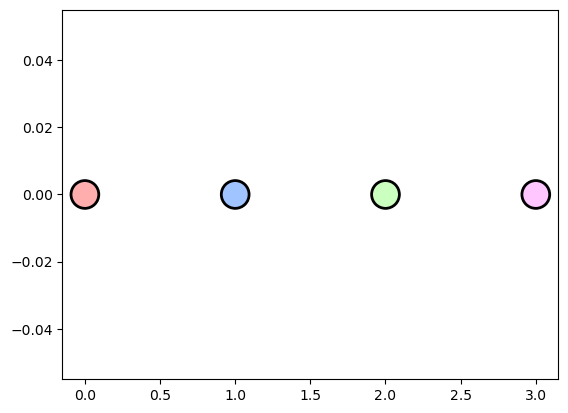

In [39]:
colorpalette = ["#FFADAD", "#A0C4FF", "#CAFFBF", "#FFC6FF"]
palette_rgb = [to_rgb(color) for color in colorpalette]

colors_edges = np.array(["tab:red", "tab:blue", "tab:green", "tab:gray"])
markers = ["s", "o", "D", "^"]

plot.plot_palette()

os.makedirs(path_to_figures, exist_ok=True)

# Graph plots constants
edge_a=.2
edge_cs="arc3,rad=0.2"

([], [])

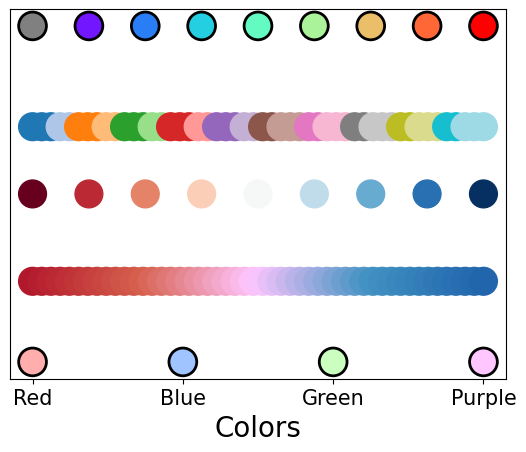

In [40]:
from matplotlib.colors import LinearSegmentedColormap
n_samples = 10
#orig_cmap = plt.get_cmap("Spectral", n_samples+1)
orig_cmap = plt.get_cmap("gist_rainbow", n_samples)
orig_cmap = plt.get_cmap("rainbow", n_samples)
#colorlist = ["gray"] + [orig_cmap(i) for i in range(n_samples//2)] + [orig_cmap(n_samples//2+i+1) for i in range(n_samples//2)]
colorlist = ["gray"] + [orig_cmap(i) for i in range(n_samples)]
custom_cmap = LinearSegmentedColormap.from_list("", colorlist)

plt.scatter([0, 1, 2, 3], [0]*4, c=palette_rgb, s=400, edgecolors="k", lw=2)
plt.scatter(np.linspace(0, 3, 9), [0.5]*9, c=np.arange(9), cmap=custom_cmap, s=400, edgecolors="k", lw=2)

plt.scatter(np.linspace(0, 3, 9), [0.25]*9, c=np.arange(9), cmap="RdBu", s=400)

n_rdbu = 11
RdBu = plt.get_cmap("RdBu", n_rdbu)
purple_def = orig_cmap(0)
purple_def = palette_rgb[-1]
#purple_def = "tab:purple"

color_offset = 1
RedPurpleBlue_list = [RdBu(color_offset), purple_def , RdBu(n_rdbu-color_offset-1)]
RedPurpleBlue_list = [RdBu(color_offset), RdBu(2*color_offset), purple_def , RdBu(n_rdbu-2*color_offset-1), RdBu(n_rdbu-color_offset-1)]
RedPurpleBlue = LinearSegmentedColormap.from_list("", RedPurpleBlue_list)

n_plots = 50
plt.scatter(np.linspace(0, 3, n_plots), [0.12]*n_plots, c=np.arange(n_plots), cmap=RedPurpleBlue.resampled(n_plots), s=400)
plt.scatter(np.linspace(0, 3, n_plots), [0.35]*n_plots, c=np.arange(n_plots), cmap="tab20", s=400)

plt.xlabel("Colors", fontsize=20)
plt.xticks([0, 1, 2, 3], ["Red", "Blue", "Green", "Purple"], fontsize=15)

plt.yticks([])

(0.3, 0.6)

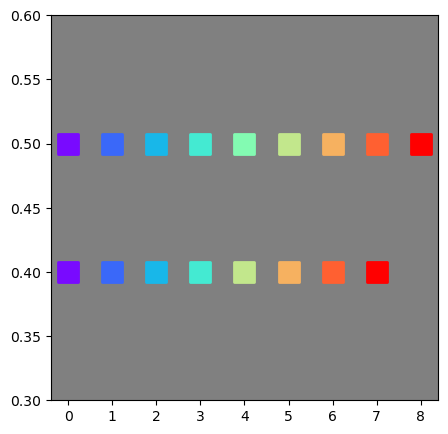

In [41]:
nclust = 9
fig, axes = plt.subplots(figsize=(5, 5))
for i in range(nclust):
    axes.scatter(i, 0.5, color=custom_cmap.resampled(nclust+1)(i+1), s=200, marker="s", lw=2)

axes.set_facecolor("gray")

exclude = [3, 4]
exclude = [4, 5]
exclude = [4]
cluster_colors8 = [custom_cmap.resampled(nclust+1)(i+1) for i in range(nclust) if i not in exclude]

cmap_8clusters = LinearSegmentedColormap.from_list("", ["gray"] + cluster_colors8)

for i in range(8):
    axes.scatter(i, 0.4, color=cluster_colors8[i], s=200, marker="s", lw=2)

axes.set_ylim(0.3, 0.6)

# Toy scheme and plot (Figure 1)

<Axes: title={'center': 'Bimodularity embedding $(k={0})$'}, xlabel='Left singular vector $u_{0}$', ylabel='Right singular vector $v_{0}$'>

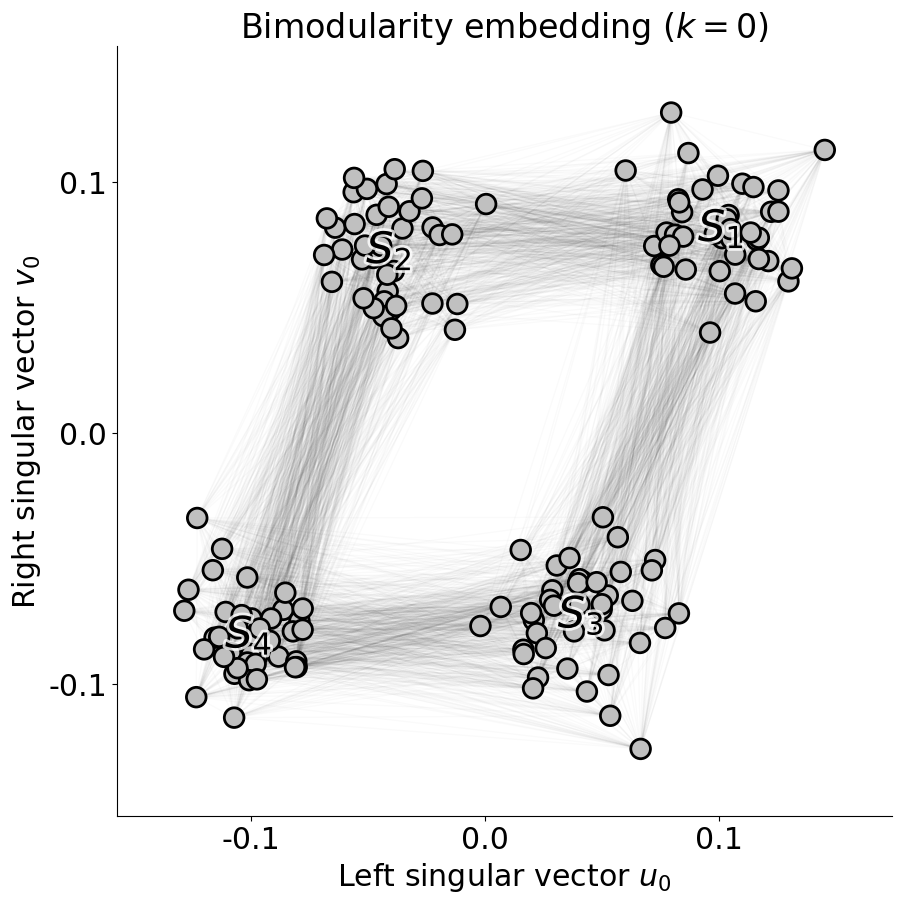

In [140]:
importlib.reload(plot)

n_per_com = 40
density_value = .4
eig_id = 0

write_s = False
for_overleaf = True

# Building the graph
# graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
#                                       connect_density=[density_value, density_value, 0, 
#                                                        density_value, density_value, density_value],
#                                       #connect_density=[1, 1, 0, 1, 1, 1],
#                                       connect_out_prob=[1, 0, 0, 0.5, 1, 0], seed=1234)

#seed = 12
seed = 1234
seed = 21
seed = 28

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      #connect_density=[1, 1, 0, 1, 1, 1],
                                      connect_out_prob=[1, 0, 0, 0.5, 1, 0],
                                      seed=seed)

fig, axes = plt.subplots(figsize=(10, 10))

plot.plot_graph_embedding(graph, vector_id=0, ax=axes, write_label=True, label_lw=4, directed_edges=False,
                          use_cmap=True, cmap="silver", node_clusers=np.ones(n_per_com*4),)

R^2 = 0.10841505503770898


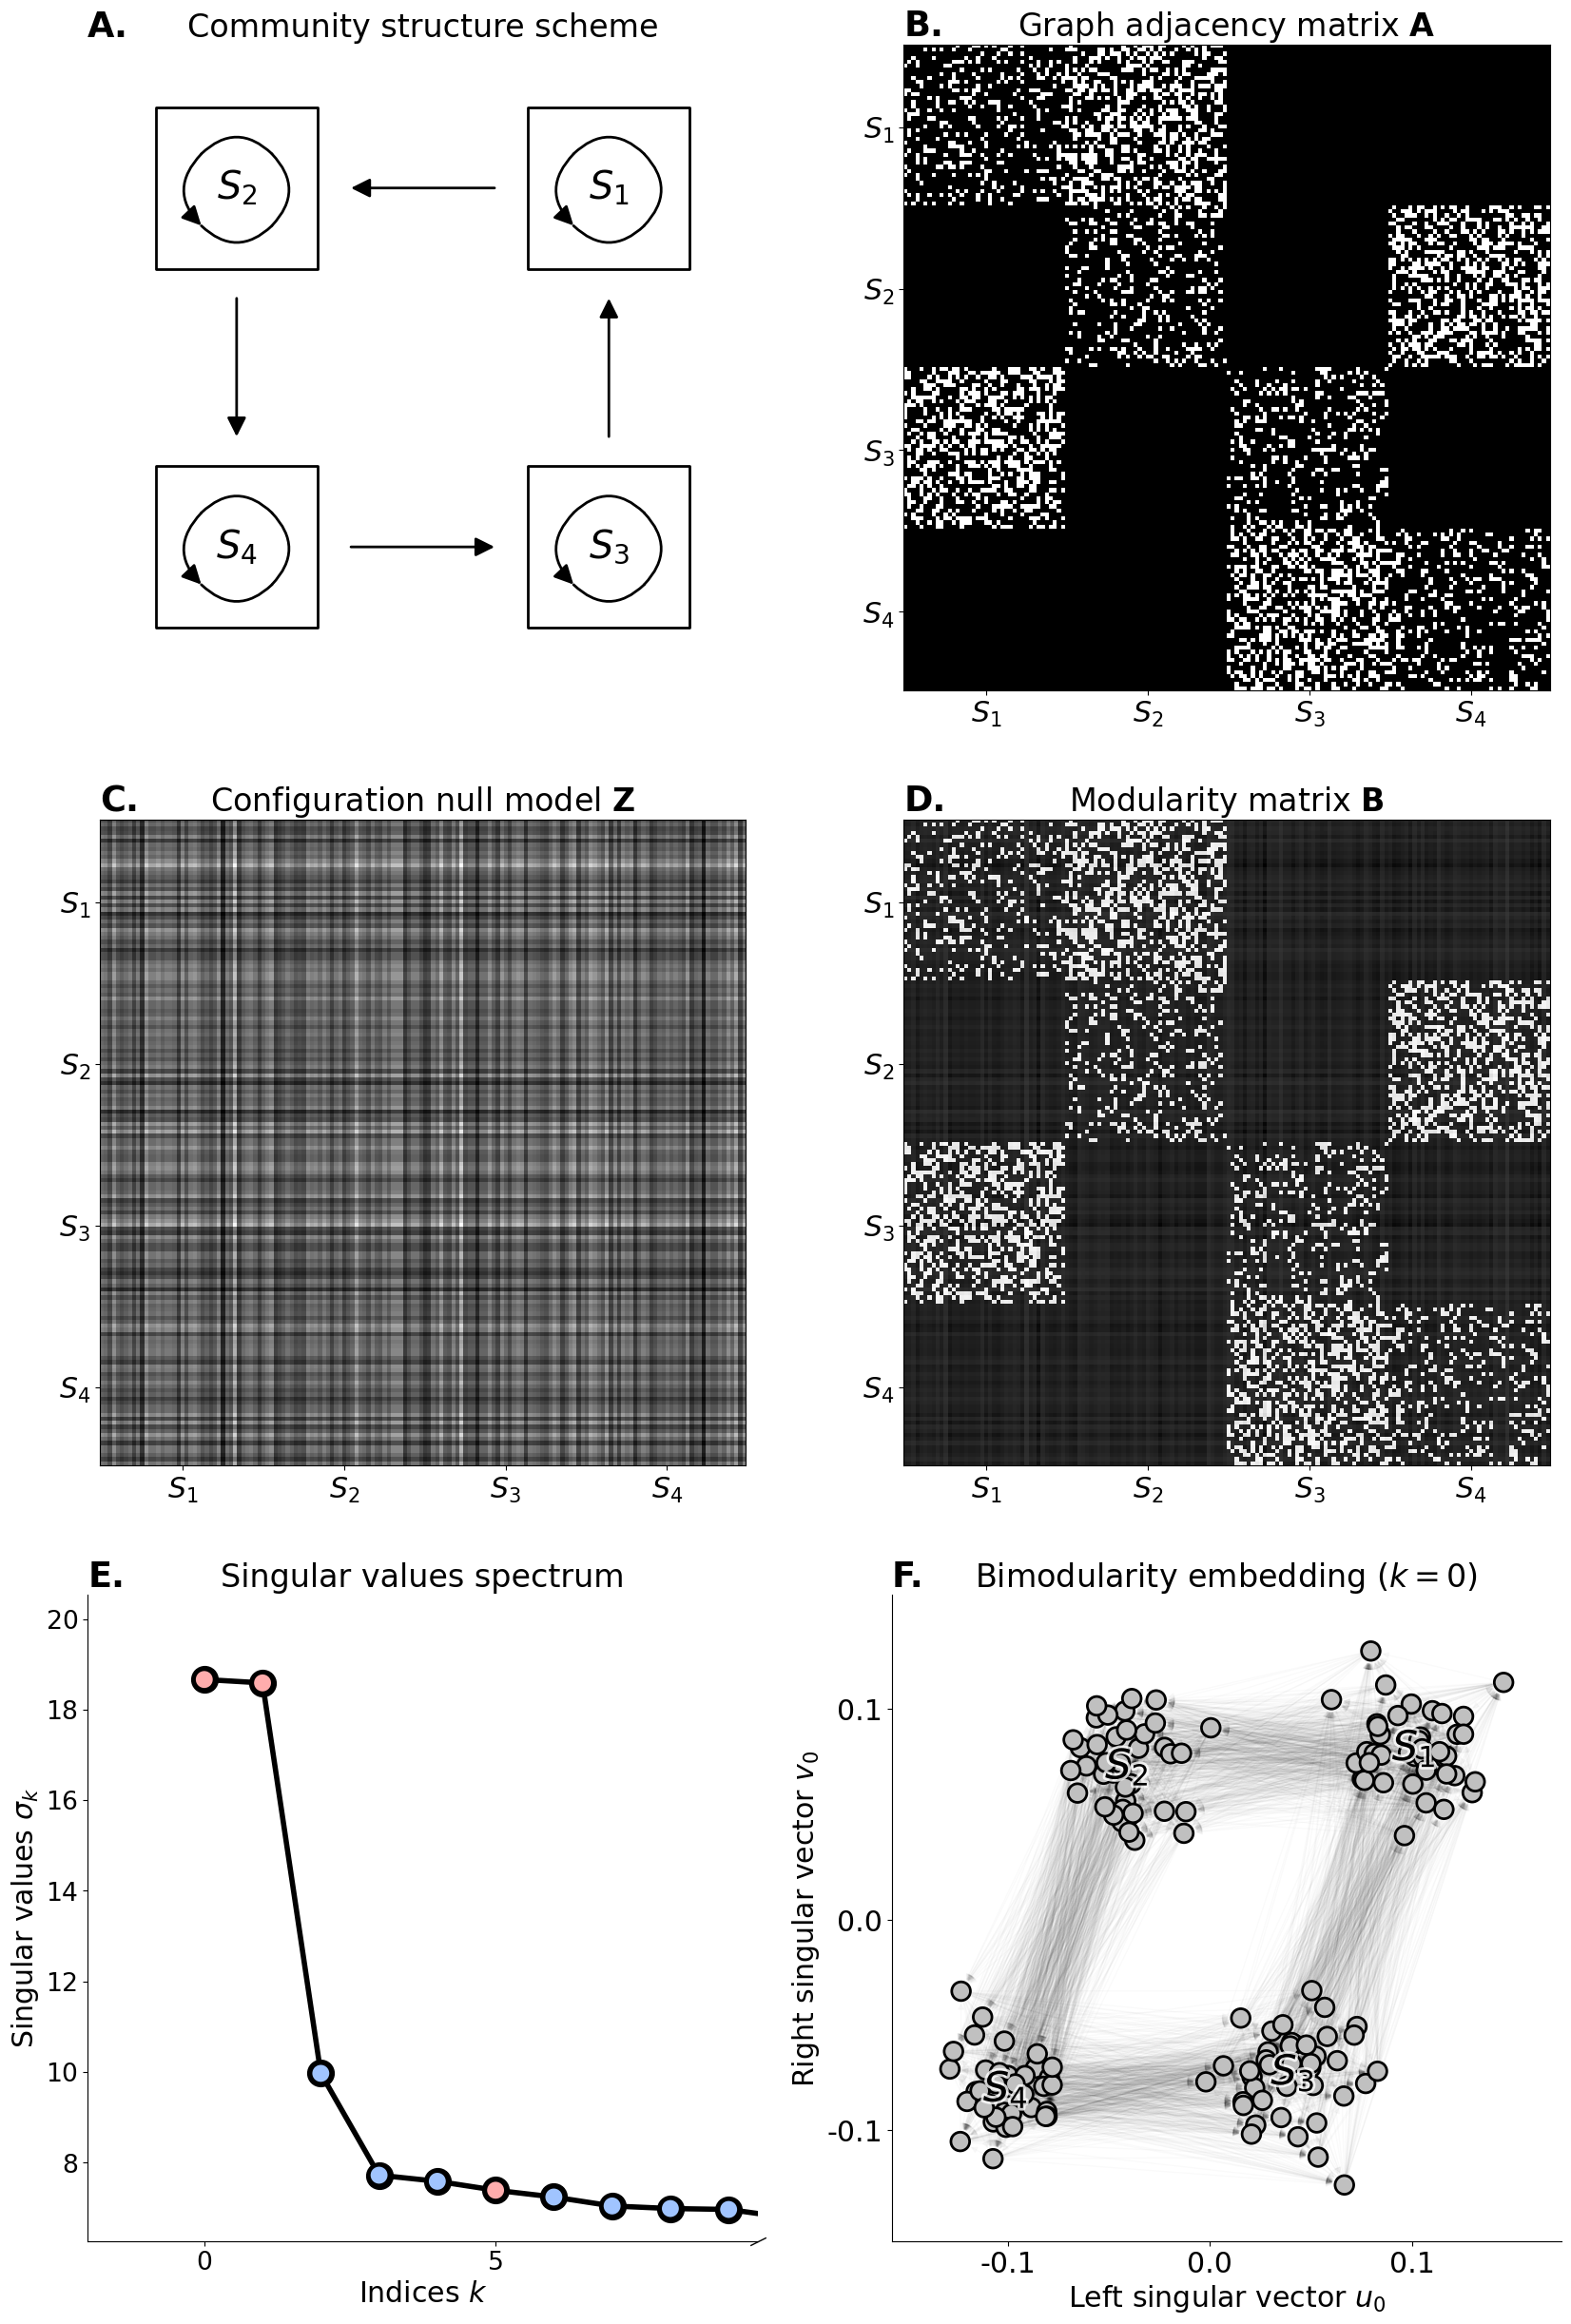

In [141]:
importlib.reload(plot)

n_per_com = 40
density_value = .4
eig_id = 0

write_s = False
for_overleaf = True

# Building the graph
# graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
#                                       connect_density=[density_value, density_value, 0, 
#                                                        density_value, density_value, density_value],
#                                       #connect_density=[1, 1, 0, 1, 1, 1],
#                                       connect_out_prob=[1, 0, 0, 0.5, 1, 0], seed=1234)

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      #connect_density=[1, 1, 0, 1, 1, 1],
                                      connect_out_prob=[1, 0, 0, 0.5, 1, 0],
                                      seed=seed)

fig, axes = plt.subplots(3, 2, figsize=(2*10, 3*10))

#axes[0, 0] = plot.plot_community_scheme(ax=axes[0, 0], title_letter="A.")
axes[0, 0] = plot.plot_community_scheme(ax=axes[0, 0], title_letter="A.",
                                        com_names=["$S_4$", "$S_3$", "$S_2$", "$S_1$"],
                                        use_cmap=False, 
                                        x_names=["", ""], y_names=["", ""],
                                        arrow_colors=["k"]*6, plot_cycle=True)
                                #   x_names=["$C^{{out}}_1$", "$C^{{out}}_2$"],
                                #   y_names=["$C^{{in}}_1=\mathcal{{M}}(C^{{out}}_1)$", "$C^{{in}}_2=\mathcal{{M}}(C^{{out}}_2)$"],

axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("")

# Smaller loops
# for self_coords in [(0.55, 0.55), (-0.65, 0.55), (-0.65, -0.45), (0.55, -0.45)]:
#     self_x, self_y = self_coords
#     axes =  draw_self_loop(axes, self_x, self_y, 0.1, rad=0.49, offset=0.01)

# Bigger self loops
for self_coords in [(0.4, 0.4), (-0.6, 0.4), (-0.6, -0.6), (0.4, -0.6)]:
    self_x, self_y = self_coords
    axes[0, 0] =  plot.draw_self_loop(axes[0, 0], self_x, self_y, 0.2, rad=0.5, offset=0.01, mutation_scale=30, onearrow=True)

send_only = True
receive_only = True
norm_s = False

if not receive_only:
    x_pos = [-0.75, 0.25]
    highlights = [Rectangle((x, -0.8), 0.5, 1.6) for i, x in enumerate(x_pos)]

    pc = PatchCollection(highlights, facecolor="none", edgecolor=np.array(palette_rgb)[[0, 1]], alpha=0.5, lw=5, zorder=0)
    #pc = PatchCollection(highlights, facecolor=np.array(palette_rgb)[[0, 1]], alpha=0.4, zorder=0)
    axes[0, 0].add_collection(pc)

if not send_only:
    x_pos = [-0.75, 0.25]
    highlights = [Rectangle((-0.8, x), 1.6, 0.5) for i, x in enumerate(x_pos)]

    pc = PatchCollection(highlights, facecolor="none", edgecolor=np.array(palette_rgb)[[0, 1]], alpha=0.5, lw=5, ls=":", zorder=0)
    #pc = PatchCollection(highlights, facecolor=np.array(palette_rgb)[[0, 1]], alpha=0.4, zorder=0)
    axes[0, 0].add_collection(pc)

axes[0, 1] = plot.plot_adjacency(graph, ax=axes[0, 1], title_letter="B.", use_cmap=False,
                                 override_title=r"Graph adjacency matrix $\mathbf{A}$")

axes[1, 0] = plot.plot_adjacency(dgsp.configuration_null(graph, "outin"), ax=axes[1, 0], title_letter="C.",
                                 use_cmap=False, override_title=r"Configuration null model $\mathbf{Z}$")
axes[1, 1] = plot.plot_adjacency(dgsp.modularity_matrix(graph, "outin"), ax=axes[1, 1], title_letter="D.",
                                 use_cmap=False, override_title=r"Modularity matrix $\mathbf{B}$")

axes[2, 0] = plot.plot_spectrum(graph, vector_id=eig_id, write_s=write_s, fig=fig, ax=axes[2, 0],
                                fix_negative=False, normalize_s=norm_s,
                                title_letter="E.", override_title="Singular values spectrum")
axes[2, 1] = plot.plot_graph_embedding(graph, vector_id=eig_id, ax=axes[2, 1], title_letter="F.", write_label=True, label_lw=4,
                                       use_cmap=True, cmap="silver", node_clusers=np.ones(n_per_com*4),)

dpi = 300
overleaf_suffix = ""
fname = f"Figure-01-eig{eig_id:02d}{write_s*'-writeS'}{norm_s*'-Norm'}-v00{overleaf_suffix*for_overleaf}.png"
fig.savefig(op.join(path_to_figures, fname),
            dpi=dpi, bbox_inches="tight")

dpi = 100
overleaf_suffix = "-Overleaf"
fname = f"Figure-01-eig{eig_id:02d}{write_s*'-writeS'}{norm_s*'-Norm'}-v00{overleaf_suffix*for_overleaf}.png"
fig.savefig(op.join(path_to_figures, fname), dpi=dpi, bbox_inches="tight")

## Simpler figure

R^2 = 0.10841505503770898


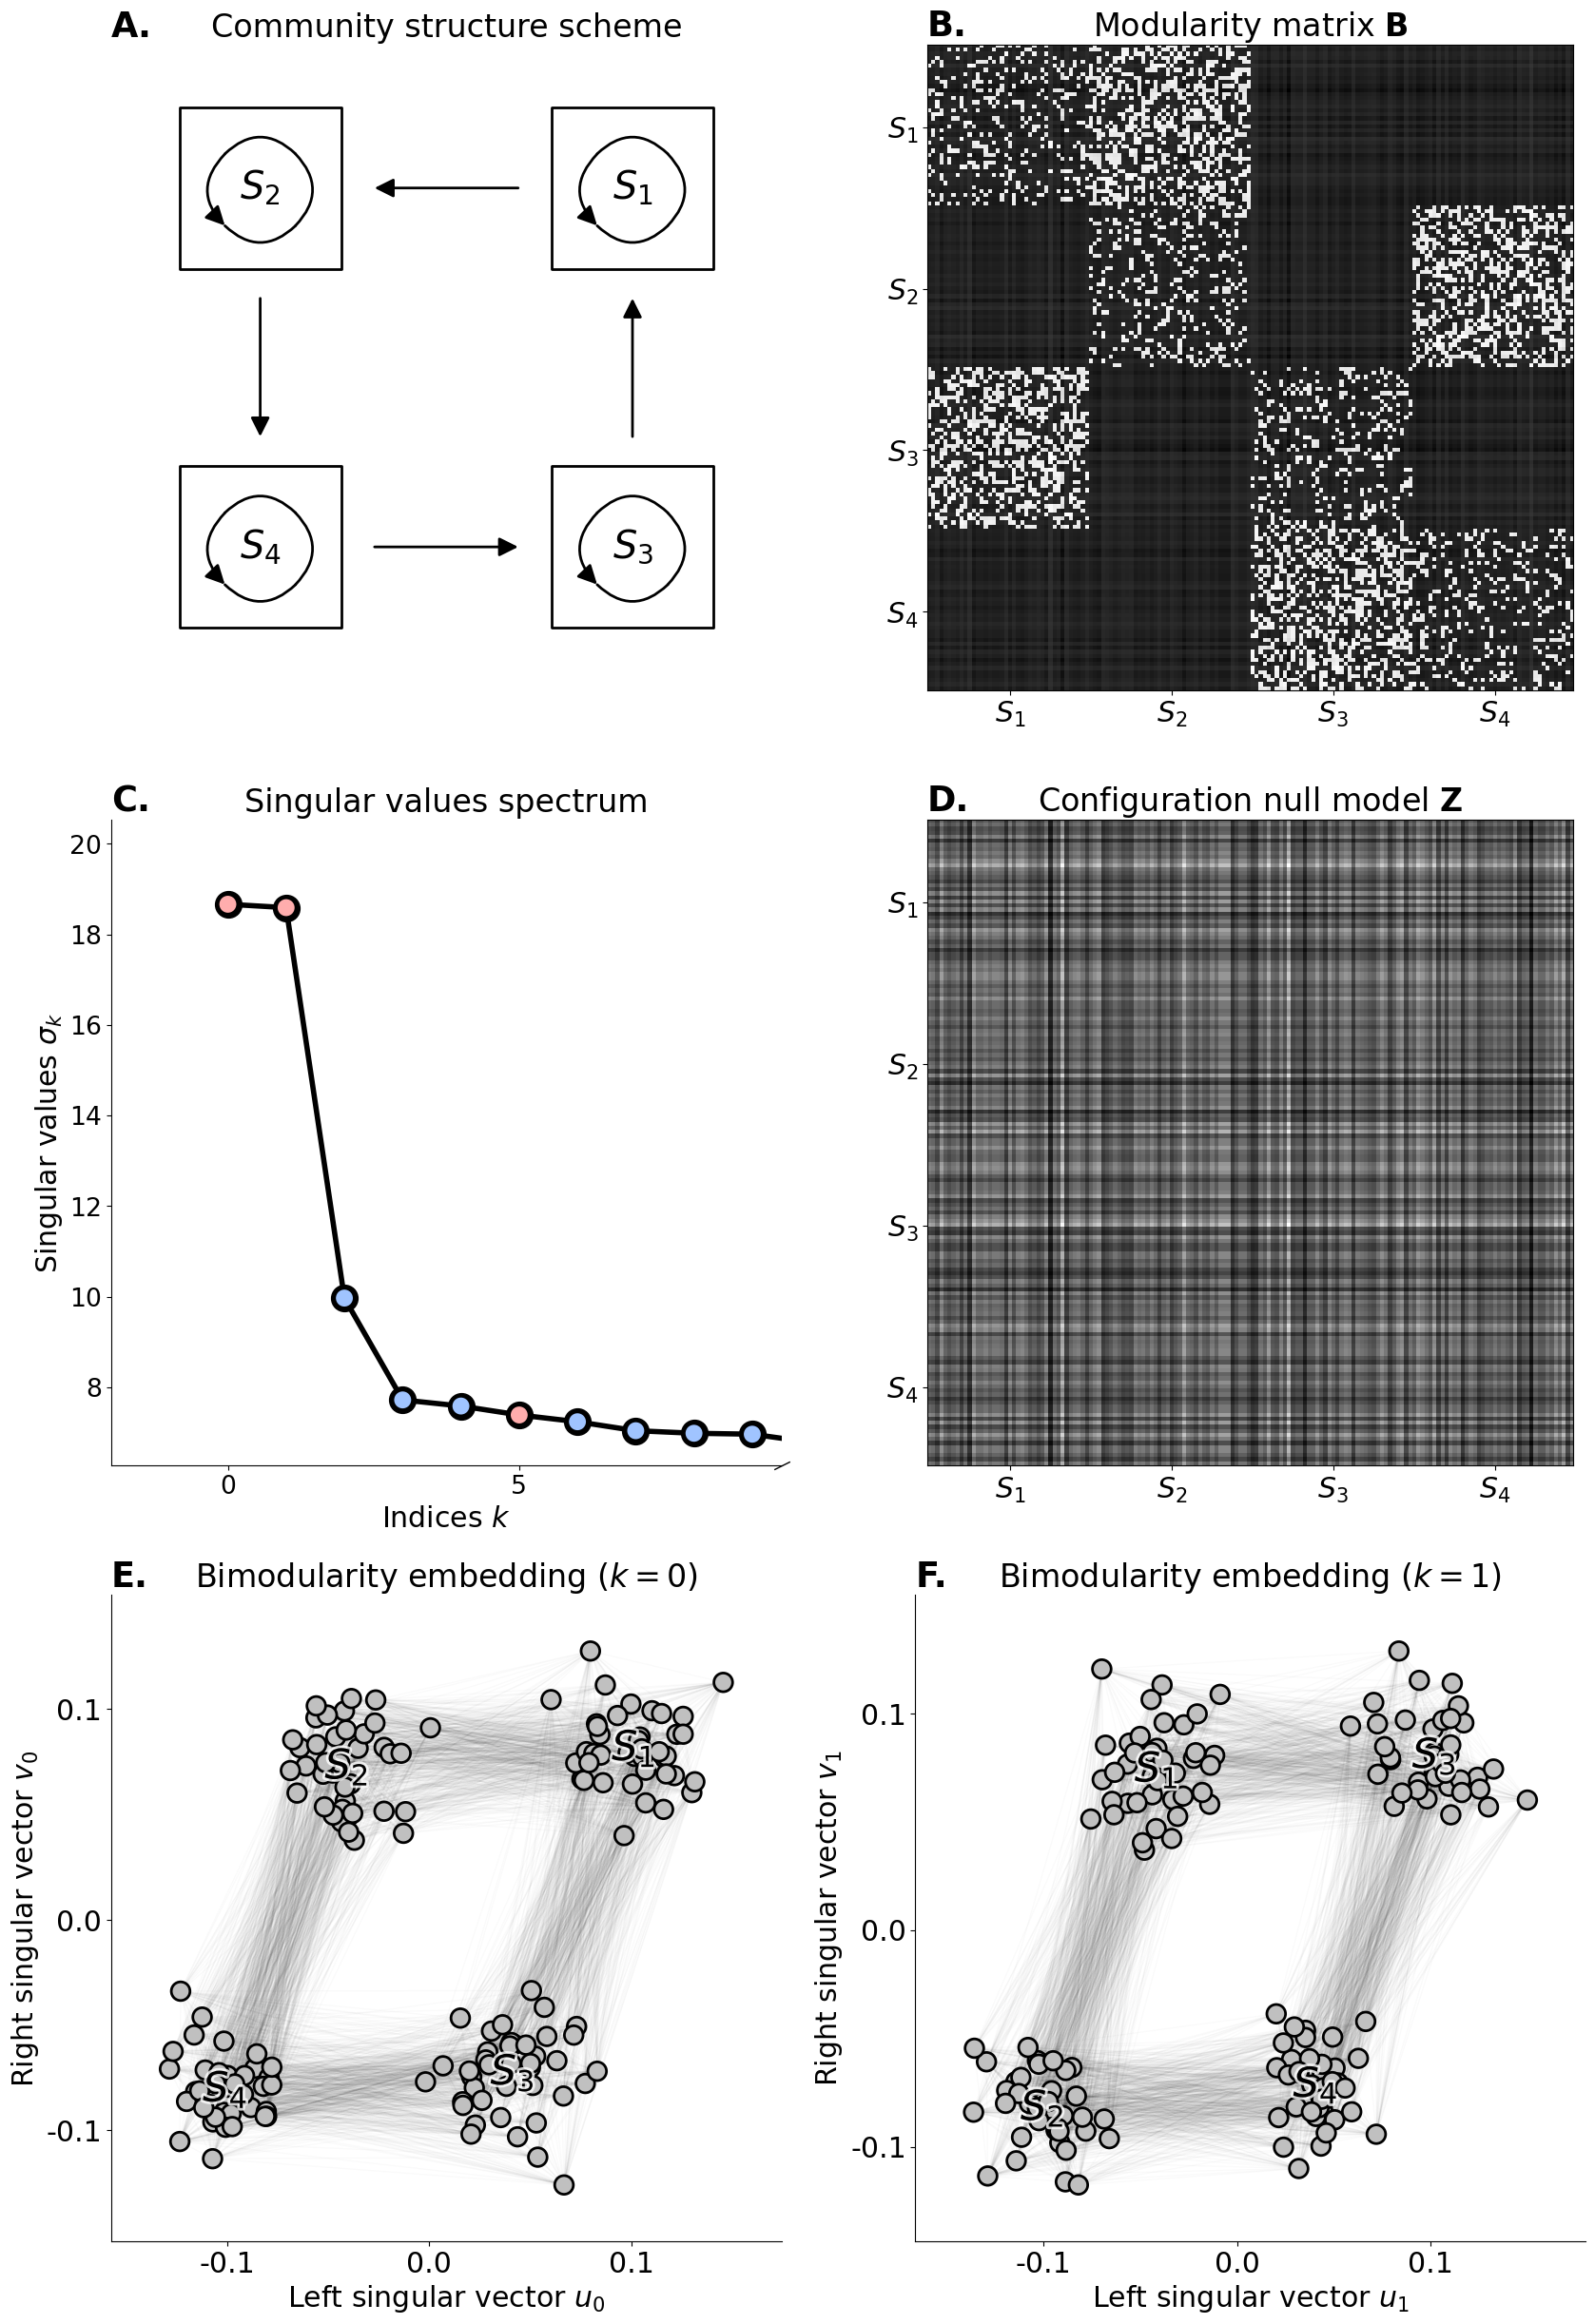

In [142]:
importlib.reload(plot)

n_per_com = 40
density_value = .4
eig_id = 0

write_s = False
for_overleaf = True

# Building the graph
# graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
#                                       connect_density=[density_value, density_value, 0, 
#                                                        density_value, density_value, density_value],
#                                       #connect_density=[1, 1, 0, 1, 1, 1],
#                                       connect_out_prob=[1, 0, 0, 0.5, 1, 0], seed=1234)

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      #connect_density=[1, 1, 0, 1, 1, 1],
                                      connect_out_prob=[1, 0, 0, 0.5, 1, 0], seed=seed)

fig, axes = plt.subplots(3, 2, figsize=(2*10, 3*10))

#axes[0, 0] = plot.plot_community_scheme(ax=axes[0, 0], title_letter="A.")
axes[0, 0] = plot.plot_community_scheme(ax=axes[0, 0], title_letter="A.",
                                        com_names=["$S_4$", "$S_3$", "$S_2$", "$S_1$"],
                                        use_cmap=False, 
                                        x_names=["", ""], y_names=["", ""],
                                        arrow_colors=["k"]*6, plot_cycle=True)
                                #   x_names=["$C^{{out}}_1$", "$C^{{out}}_2$"],
                                #   y_names=["$C^{{in}}_1=\mathcal{{M}}(C^{{out}}_1)$", "$C^{{in}}_2=\mathcal{{M}}(C^{{out}}_2)$"],

axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("")

# Bigger self loops
for self_coords in [(0.4, 0.4), (-0.6, 0.4), (-0.6, -0.6), (0.4, -0.6)]:
    self_x, self_y = self_coords
    axes[0, 0] =  plot.draw_self_loop(axes[0, 0], self_x, self_y, 0.2, rad=0.5, offset=0.01, mutation_scale=30, onearrow=True)

send_only = True
receive_only = True
norm_s = False

if not receive_only:
    x_pos = [-0.75, 0.25]
    highlights = [Rectangle((x, -0.8), 0.5, 1.6) for i, x in enumerate(x_pos)]

    pc = PatchCollection(highlights, facecolor="none", edgecolor=np.array(palette_rgb)[[0, 1]], alpha=0.5, lw=5, zorder=0)
    #pc = PatchCollection(highlights, facecolor=np.array(palette_rgb)[[0, 1]], alpha=0.4, zorder=0)
    axes[0, 0].add_collection(pc)

if not send_only:
    x_pos = [-0.75, 0.25]
    highlights = [Rectangle((-0.8, x), 1.6, 0.5) for i, x in enumerate(x_pos)]

    pc = PatchCollection(highlights, facecolor="none", edgecolor=np.array(palette_rgb)[[0, 1]], alpha=0.5, lw=5, ls=":", zorder=0)
    #pc = PatchCollection(highlights, facecolor=np.array(palette_rgb)[[0, 1]], alpha=0.4, zorder=0)
    axes[0, 0].add_collection(pc)

# axes[0, 1] = plot.plot_adjacency(graph, ax=axes[0, 1], title_letter="B.", use_cmap=False,
#                                  override_title=r"Graph adjacency matrix $\mathbf{A}$")
axes[0, 1] = plot.plot_adjacency(dgsp.modularity_matrix(graph, "outin"), ax=axes[0, 1], title_letter="B.",
                                 use_cmap=False, override_title=r"Modularity matrix $\mathbf{B}$")

axes[1, 0] = plot.plot_spectrum(graph, vector_id=eig_id, write_s=write_s, fig=fig, ax=axes[1, 0],
                                fix_negative=False, normalize_s=norm_s,
                                title_letter="C.", override_title="Singular values spectrum")

axes[1, 1] = plot.plot_adjacency(dgsp.configuration_null(graph, "outin"), ax=axes[1, 1], title_letter="D.",
                                 use_cmap=False, override_title=r"Configuration null model $\mathbf{Z}$")

axes[2, 0] = plot.plot_graph_embedding(graph, vector_id=eig_id, ax=axes[2, 0], title_letter="E.", write_label=True, label_lw=4,
                                       use_cmap=True, cmap="silver", node_clusers=np.ones(n_per_com*4), directed_edges=False)

axes[2, 1] = plot.plot_graph_embedding(graph, vector_id=eig_id+1, ax=axes[2, 1], title_letter="F.", write_label=True, label_lw=4,
                                       use_cmap=True, cmap="silver", node_clusers=np.ones(n_per_com*4), directed_edges=False)

dpi = 300
fname = f"Figure-01-Simplified-v00.png"
fig.savefig(op.join(path_to_figures, fname),
            dpi=dpi, bbox_inches="tight")

dpi = 100
fname = f"Figure-01-Simplified-v00-Overleaf.png"
fig.savefig(op.join(path_to_figures, fname), dpi=dpi, bbox_inches="tight")

# Bicommunity detection (Figure 2)

$[\mathbf{u}_{0}[i]\,\mathbf{u}_{1}[i]\,\dots\,\mathbf{u}_{N}[i]\,\mathbf{v}_{0}[j]\,\mathbf{v}_{1}[j]\,\dots\,\mathbf{v}_{N}[j]]$
[3 2 1 0 7 6 5 4]


/var/folders/nj/ltrlv15x5jj2jq78pbb2srz80000gn/T/ipykernel_36901/3648299090.py:249: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)


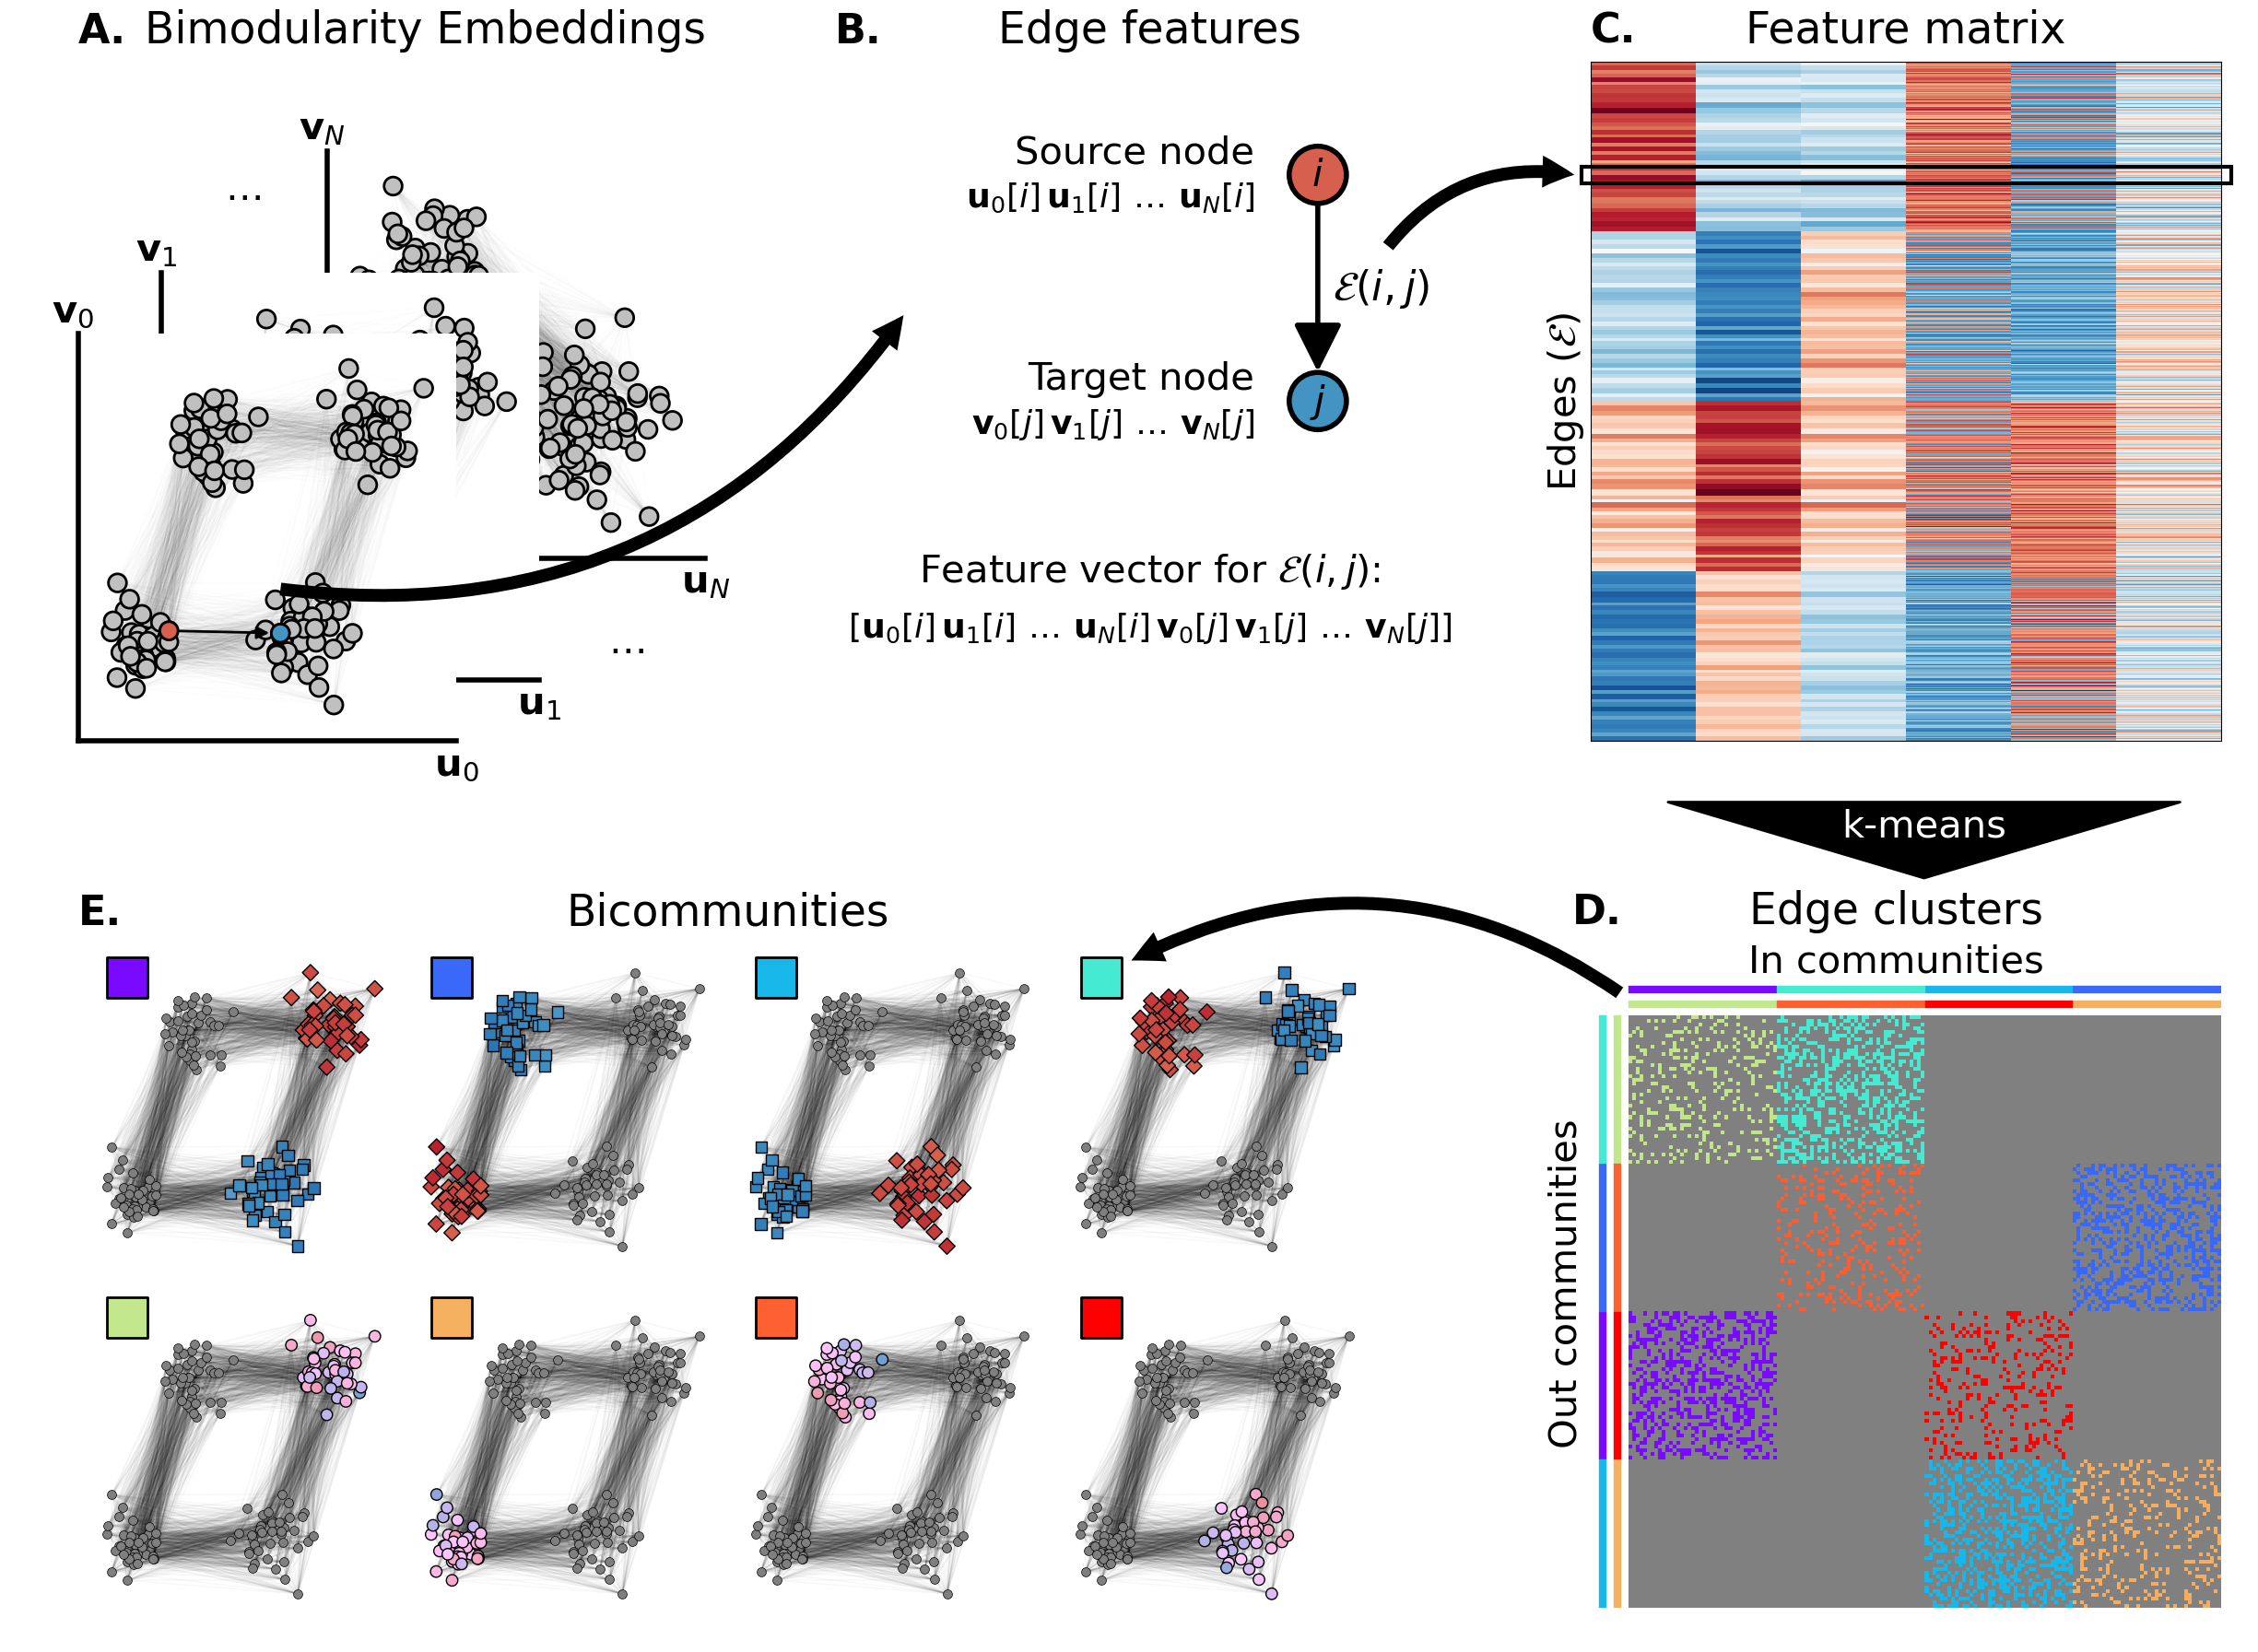

In [146]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

fontscale = 1
stack_param = 0.03
vector_id_max = 3

fig, all_axes = plt.subplots(nrows=2, figsize=(30, 22), gridspec_kw={"hspace":0.3})

for ax in all_axes:
    ax.axis("off")

gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=all_axes[0], wspace=0.2) #, width_ratios=[1, 1, 1])
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=all_axes[1], wspace=0.2, width_ratios=[2, 1])

axes = [fig.add_subplot(gs1[0]),
        fig.add_subplot(gs1[1]),
        fig.add_subplot(gs1[2]),
        fig.add_subplot(gs2[1]),
        fig.add_subplot(gs2[0])]

n_per_com = 40
density_value = .4
show_n_eig = 20
fontscale = 1

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      connect_out_prob=[1, 0, 0.5, 0.5, 1, 0],
                                      seed=seed)
                                      #seed=1234)

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

## Bimodularity embeddings
axes[0].set_title("Bimodularity Embeddings", fontsize=34*fontscale, pad=15, x=0.55)
axes[0].set_title("A.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

axes[0].axis("off")

pos = axes[0].get_position().bounds

j = vector_id_max - 1
for i in range(vector_id_max+1):
    new_ax = fig.add_axes([pos[0]+stack_param*(vector_id_max-i),
                           pos[1]+stack_param*(vector_id_max-i),
                           pos[2]*0.6, pos[3]*0.6])
    
    if i == 1:
        new_ax.set_xlabel("$\dots$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel("$\dots$", fontsize=30*fontscale, y=1.01, rotation=0)
        new_ax.spines[:].set_visible(False)
        new_ax.set_facecolor("none")
        new_ax.set_xticks([])
        new_ax.set_yticks([])
        continue
    
    selected = [158, 119]
    colors = ["silver"] * len(S)
    #if j == 0:
    #    colors = ["silver" if k != selected[0] else "tab:red" for k in range(len(S))]
    #    colors = [col if k != selected[1] else "tab:blue" for k, col in enumerate(colors)]
    
    new_ax.scatter(U[:, j], V[:, j], s=200, color=colors, edgecolors="k", lw=2, zorder=2)
    #new_ax.scatter(U[:, j], V[:, j], s=200, color="silver", edgecolors="k", lw=2, zorder=2)

    graph_pos = {node_i: (U[node_i, j], V[node_i, j]) for node_i in range(len(S))}
    nx_graph = nx.Graph(graph)
    nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=.01)

    if j == 0:
        color_2_nodes = [0.2, 0.8]
        highlight_graph = np.array([[0, 1], [0, 0]])
        new_ax.scatter(U[selected, j], V[selected, j], s=200, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=2, zorder=4)
    
        graph_pos = {highlight_i: (U[node_i, j], V[node_i, j]) for highlight_i, node_i in enumerate(selected)}
        nx_graph = nx.DiGraph(highlight_graph)
        arrow_list = nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=1, width=2, arrowsize=20)

        for arrow in arrow_list:
            arrow.set_zorder(3)

    new_ax.spines[["top", "right"]].set_visible(False)
    #new_ax.spines[["left", "bottom"]].set_linewidth(2)
    new_ax.spines[:].set_linewidth(4)
    new_ax.set_xticks([])
    new_ax.set_yticks([])
    
    if i == 0:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{N}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{N}}$", fontsize=30*fontscale, y=1.01, rotation=0)
    else:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{{j}}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{{j}}}$", fontsize=30*fontscale, y=1.01, rotation=0)

    j -= 1

## Edge features (computations)
axes[1].set_title("Edge features", fontsize=34*fontscale, pad=15)
axes[1].set_title("B.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})
axes[1].spines[:].set_visible(False)

two_nodes_g = nx.DiGraph(np.array([[0, 1], [0, 0]]))
#two_nodes_g_pos = {0: (0, 0), 1: (0.9, 0.9)}
two_nodes_g_pos = {0: (0.8, .92), 1: (0.8, 0.08)}

cmap = plt.get_cmap("RdBu", 5)
axes[1].scatter([0.8, 0.8], [1, 0], s=2000, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=4, zorder=2)
#axes[1].scatter([0.8, 0.8], [1, 0], s=2000, color="silver", edgecolors="k", lw=4, zorder=1)
nx.draw_networkx_edges(two_nodes_g, pos=two_nodes_g_pos, ax=axes[1], edge_color="k", width=4, arrowsize=80)

axes[1].text(0.8, 1, "$i$", fontsize=30*fontscale, ha="center", va="center")
axes[1].text(0.8, 0, "$j$", fontsize=30*fontscale, ha="center", va="center")

all_u_lab = []
all_v_lab = []
for i, val in enumerate(["0", "1", "...", "N"]):
    if val == "...":
        #lab_u = f"..."
        #lab_v = f"..."
        lab_u = f"$\dots$"
        lab_v = f"$\dots$"
    
        #all_u_lab.append(lab_u)
        #all_v_lab.append(lab_v)
    else:
        lab_u = f"$\mathbf{{u}}_{{{val}}}[i]$"
        lab_v = f"$\mathbf{{v}}_{{{val}}}[j]$"
    
    all_u_lab.append(lab_u[1:-1])
    all_v_lab.append(lab_v[1:-1])

    # axes[1].text(0.4*i-0.5, 1, lab_u, fontsize=30*fontscale, ha="right", va="center")
    # axes[1].text(0.4*i-0.5, 0.3, lab_v, fontsize=30*fontscale, ha="right", va="center")

u_feat = "$"+ "\,".join(all_u_lab) +"$"
v_feat = "$"+ "\,".join(all_v_lab) +"$"
axes[1].text(0.5, 0.9, u_feat, fontsize=26*fontscale, ha="right", va="center")
axes[1].text(0.5, -0.1, v_feat, fontsize=26*fontscale, ha="right", va="center")

axes[1].text(0.5, 1.1, "Source node", fontsize=30*fontscale, ha="right", va="center")
axes[1].text(0.5, 0.1, "Target node", fontsize=30*fontscale, ha="right", va="center")

axes[1].text(1.1, 0.5, "$\mathcal{{E}}(i,j)$", fontsize=32*fontscale, ha="center", va="center")

#feature_vec = r"$[$" + "$;\,$".join(all_u_lab) + "$;$\n" + "$;\,$".join(all_v_lab)+r"$]$"
#axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:\n" + feature_vec , fontsize=26*fontscale, ha="center", va="center")

feature_vec = r"$[" + "\,".join(all_u_lab+all_v_lab) + r"]$"
axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:", fontsize=30*fontscale, ha="center", va="center")
print(feature_vec)
axes[1].text(0, -1, feature_vec, fontsize=26*fontscale, ha="center", va="center")

axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)

## Edge features (clustering)
axes[2].set_title("Feature matrix", fontsize=34*fontscale, pad=15)
axes[2].set_title("C.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

scale_factor = S**2/(S**2).sum()
assign = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max], assign_only=True)

maxval = np.max(np.abs(assign))
axes[2].imshow(assign, aspect="auto", vmin=-maxval, vmax=maxval, cmap="RdBu_r", interpolation="none")

xticklabels = ([f"$\mathbf{{u}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{u}}_{{N}}$"] + 
               [f"$\mathbf{{v}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{v}}_{{N}}$"]) 
#axes[2].set_xticks(np.arange(vector_id_max*2), labels=xticklabels, fontsize=30*fontscale)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_ylabel("Edges ($\mathcal{{E}}$)", fontsize=30*fontscale)

axes[3].set_title("Edge clusters", fontsize=34*fontscale, pad=15)
axes[3].set_title("D.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max])
sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

n_clusters = np.max(edge_clusters)

cmap_to_use = cmap_8clusters
#axes[3].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)
axes[3].imshow(edge_clusters_mat, cmap=cmap_to_use, interpolation="none", vmin=0, vmax=8)

#for com_i, (send, receive) in enumerate(zip(sending_communities, receiving_communities)):
for com_i in range(n_clusters):
    send = (edge_clusters_mat == com_i+1).sum(axis=1) > 0
    receive = (edge_clusters_mat == com_i+1).sum(axis=0) > 0

    plot_send = (np.where(send)[0].min(), np.where(send)[0].max())
    plot_receive = (np.where(receive)[0].min(), np.where(receive)[0].max())

    if plot_send == plot_receive:
        axes[3].plot([-3-0.5, -3-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-3-0.5, -3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+3-0.5, len(edge_clusters_mat)+3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    else:
        axes[3].plot([-7-0.5, -7-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-7-0.5, -7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+7-0.5, len(edge_clusters_mat)+7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    
    
#axes[3].plot([-1.5, -1.5], [-0.5, n_per_com-0.5], "k", lw=4)

# axes[3].set_xticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)
# axes[3].set_yticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)

axes[3].set_xlabel("In communities", fontsize=30*fontscale, labelpad=-10)
axes[3].xaxis.set_label_position('top') 
axes[3].set_ylabel("Out communities", fontsize=30*fontscale, labelpad=-10)

axes[3].set_xticks([])
axes[3].set_yticks([])

axes[3].spines[:].set_visible(False)

axes[4].set_title("Bicommunities", fontsize=34*fontscale, pad=15)
axes[4].set_title("E.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

axes[4].set_facecolor("none")

bimod = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)

sorted_id = np.flip(np.argsort(bimod))

#titles = [f"$Q_{{E}}(C_{{{i+1}}})={bimod[i]:1.2f},\,Q_{{N}}(C_{{{i+1}}})={bimod_node[i]:1.2f}$" for i in range(n_clusters)]
titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_id]

print(sorted_id)
sorted_id = np.arange(n_clusters)
reorder_id = [3, 2, 1, 0, 7, 6, 5, 4]

g_nx = nx.DiGraph(graph)
graph_pos = nx.spring_layout(g_nx)

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_id],
                               receiving_communities[sorted_id],
                               nrows=2, draw_legend=False, cmap=RedPurpleBlue,
                               fig=fig, axes=axes[4], titles=[""*n_clusters], edge_alpha=0.03)
                               #fig=fig, axes=axes[4], layout="", titles=[""*n_clusters], edge_alpha=0.03)

for com_i in range(n_clusters):
    axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)

axes[4].set_xlim(-0.15, 3.85)
axes[4].set_ylim(-0.9, 1.1)

#ax_arrows = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor="none")
ax_arrows = fig.add_axes([0.1, 0.1, 0.81, 0.8], facecolor="none")
ax_arrows.axis("off")

arrowscolor = "k"
for arrow_pos in [
    #(0.35, 0.75, 0.04, 0, ""),
    #(0.65, 0.75, 0.04, 0, ""),
    (0.855, 0.52, 0, -0.05, "k-means"),
    #(0.69, 0.22, -0.04, 0, "")
    ]:
    x_start, y_pos, x_size, y_size, text = arrow_pos

    arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor=arrowscolor, linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    if text != "":
        textcolor = "k"
        if arrowscolor == "k":
            textcolor = "w"
        ax_arrows.text(x_start+x_size/2, y_pos+y_size/3, text, color=textcolor, fontsize=30*fontscale, ha="center", va="center")

    ax_arrows.add_patch(arrow)

for arrow_pos in [
    (0.12, 0.65, 0.4, 0.82, "0.3"),
    (0.615, 0.86, 0.7, 0.905, "-0.3"),
    (0.72, 0.4, 0.5, 0.42, "0.3"),
    ]:
    x_start, y_start, x_stop, y_stop, rad = arrow_pos

    #arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor="silver", linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    arrow = FancyArrowPatch((x_start, y_start), (x_stop, y_stop), mutation_scale=50, facecolor=arrowscolor, linewidth=0, connectionstyle=f"arc3,rad={rad}", arrowstyle=ArrowStyle("simple"))

    ax_arrows.add_patch(arrow)

rectangle_highlight = Rectangle((0.702, 0.9), 0.29, 0.01, edgecolor=arrowscolor, facecolor="none", lw=3)
ax_arrows.add_patch(rectangle_highlight)

fig.savefig(op.join(path_to_figures, "Figure-02-BicommunityDetection-v00.png"), dpi=300, bbox_inches="tight")
fig.savefig(op.join(path_to_figures, "Figure-02-BicommunityDetection-v00-Overleaf.png"), dpi=100, bbox_inches="tight")

$[\mathbf{u}_{0}[i]\,\mathbf{u}_{1}[i]\,\dots\,\mathbf{u}_{N}[i]\,\mathbf{v}_{0}[j]\,\mathbf{v}_{1}[j]\,\dots\,\mathbf{v}_{N}[j]]$
[3 2 1 0 7 6 5 4]
com: 0 -> 0 1
com: 1 -> 1 1
com: 2 -> 0 0
com: 3 -> 1 0
com: 4 -> 0 -1
com: 5 -> 1 -1
com: 6 -> 0 -2
com: 7 -> 1 -2


/var/folders/nj/ltrlv15x5jj2jq78pbb2srz80000gn/T/ipykernel_36901/2964435728.py:255: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[4].scatter(x_com, y_com, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)


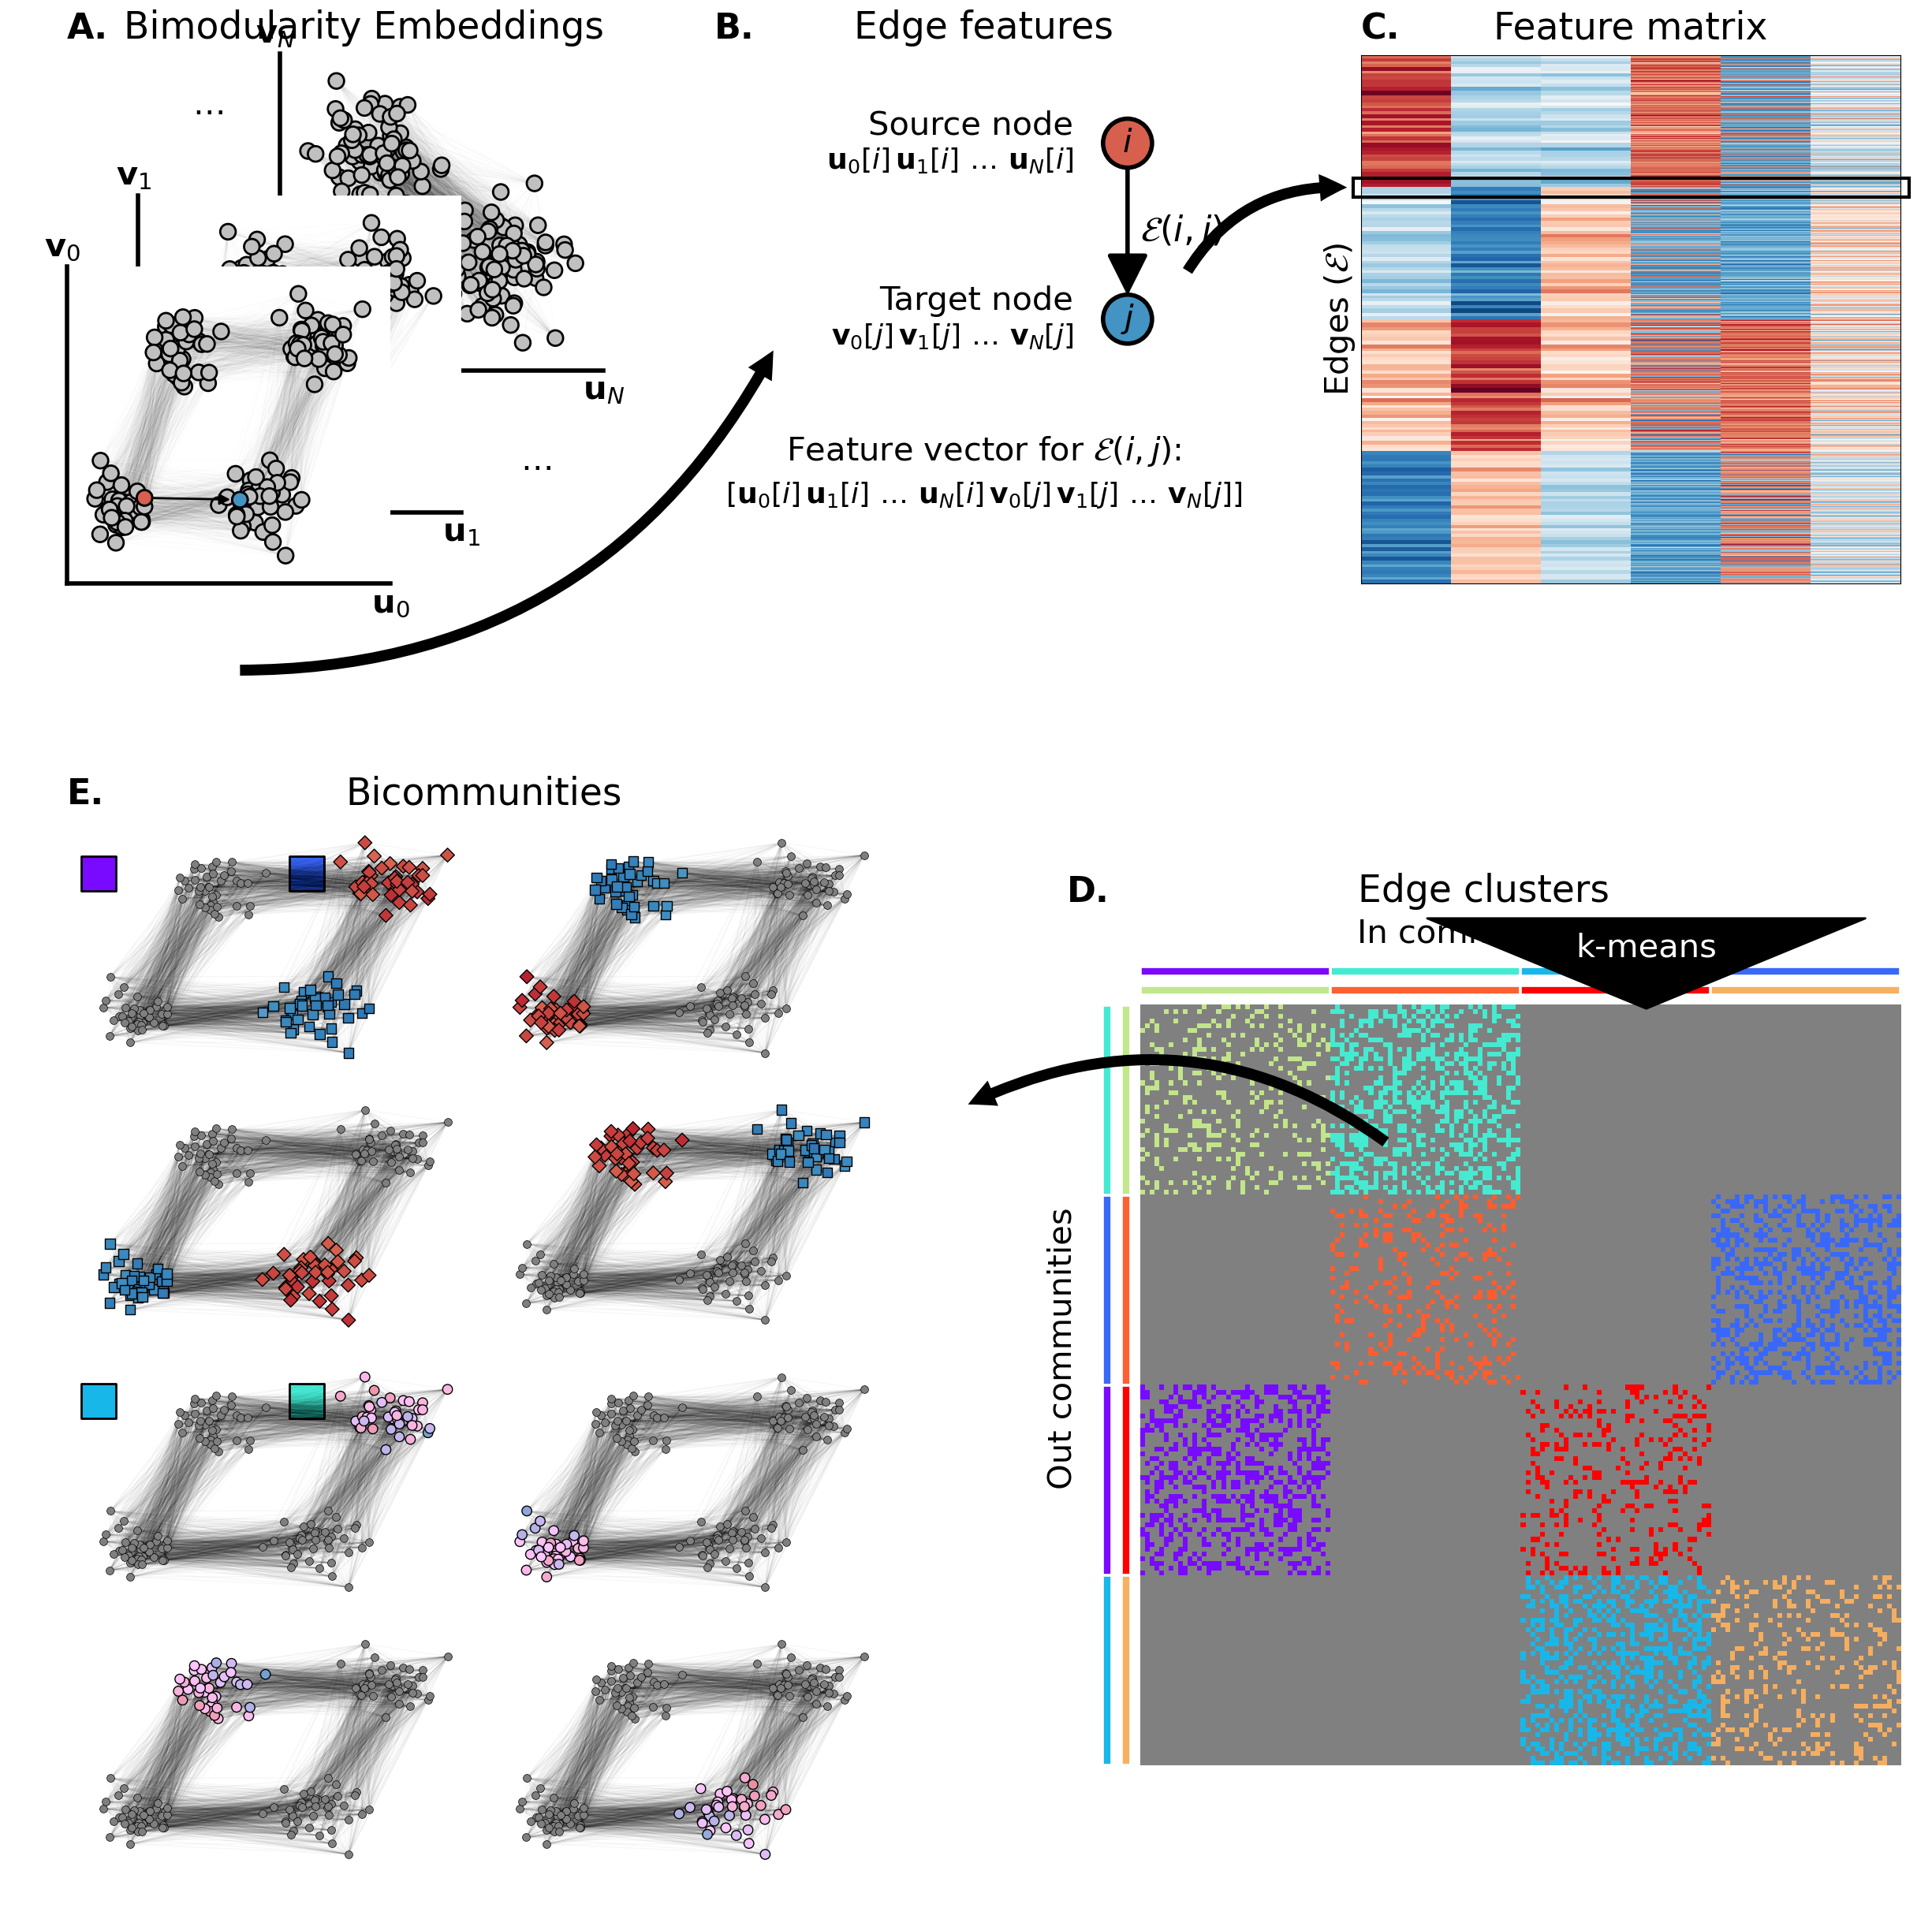

In [ ]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

fontscale = 1
stack_param = 0.03
vector_id_max = 3

#fig, all_axes = plt.subplots(nrows=2, figsize=(30, 22), gridspec_kw={"hspace":0.3, "height_ratios":[1, 2]})
fig, all_axes = plt.subplots(nrows=2, figsize=(30, 30), gridspec_kw={"hspace":0.3, "height_ratios":[1, 2]})

for ax in all_axes:
    ax.axis("off")

gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=all_axes[0], wspace=0.2) #, width_ratios=[1, 1, 1])
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=all_axes[1], wspace=0.2, width_ratios=[1, 1])

axes = [fig.add_subplot(gs1[0]),
        fig.add_subplot(gs1[1]),
        fig.add_subplot(gs1[2]),
        fig.add_subplot(gs2[1]),
        fig.add_subplot(gs2[0])]

n_per_com = 40
density_value = .4
show_n_eig = 20
fontscale = 1

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      connect_out_prob=[1, 0, 0.5, 0.5, 1, 0],
                                      seed=seed)
                                      #seed=1234)

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

## Bimodularity embeddings
axes[0].set_title("Bimodularity Embeddings", fontsize=34*fontscale, pad=15, x=0.55)
axes[0].set_title("A.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

axes[0].axis("off")

pos = axes[0].get_position().bounds

j = vector_id_max - 1
for i in range(vector_id_max+1):
    new_ax = fig.add_axes([pos[0]+stack_param*(vector_id_max-i),
                           pos[1]+stack_param*(vector_id_max-i),
                           pos[2]*0.6, pos[3]*0.6])
    
    if i == 1:
        new_ax.set_xlabel("$\dots$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel("$\dots$", fontsize=30*fontscale, y=1.01, rotation=0)
        new_ax.spines[:].set_visible(False)
        new_ax.set_facecolor("none")
        new_ax.set_xticks([])
        new_ax.set_yticks([])
        continue
    
    selected = [158, 119]
    colors = ["silver"] * len(S)
    #if j == 0:
    #    colors = ["silver" if k != selected[0] else "tab:red" for k in range(len(S))]
    #    colors = [col if k != selected[1] else "tab:blue" for k, col in enumerate(colors)]
    
    new_ax.scatter(U[:, j], V[:, j], s=200, color=colors, edgecolors="k", lw=2, zorder=2)
    #new_ax.scatter(U[:, j], V[:, j], s=200, color="silver", edgecolors="k", lw=2, zorder=2)

    graph_pos = {node_i: (U[node_i, j], V[node_i, j]) for node_i in range(len(S))}
    nx_graph = nx.Graph(graph)
    nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=.01)

    if j == 0:
        color_2_nodes = [0.2, 0.8]
        highlight_graph = np.array([[0, 1], [0, 0]])
        new_ax.scatter(U[selected, j], V[selected, j], s=200, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=2, zorder=4)
    
        graph_pos = {highlight_i: (U[node_i, j], V[node_i, j]) for highlight_i, node_i in enumerate(selected)}
        nx_graph = nx.DiGraph(highlight_graph)
        arrow_list = nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=1, width=2, arrowsize=20)

        for arrow in arrow_list:
            arrow.set_zorder(3)

    new_ax.spines[["top", "right"]].set_visible(False)
    #new_ax.spines[["left", "bottom"]].set_linewidth(2)
    new_ax.spines[:].set_linewidth(4)
    new_ax.set_xticks([])
    new_ax.set_yticks([])
    
    if i == 0:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{N}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{N}}$", fontsize=30*fontscale, y=1.01, rotation=0)
    else:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{{j}}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{{j}}}$", fontsize=30*fontscale, y=1.01, rotation=0)

    j -= 1

## Edge features (computations)
axes[1].set_title("Edge features", fontsize=34*fontscale, pad=15)
axes[1].set_title("B.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})
axes[1].spines[:].set_visible(False)

two_nodes_g = nx.DiGraph(np.array([[0, 1], [0, 0]]))
#two_nodes_g_pos = {0: (0, 0), 1: (0.9, 0.9)}
two_nodes_g_pos = {0: (0.8, .92), 1: (0.8, 0.08)}

cmap = plt.get_cmap("RdBu", 5)
axes[1].scatter([0.8, 0.8], [1, 0], s=2000, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=4, zorder=2)
#axes[1].scatter([0.8, 0.8], [1, 0], s=2000, color="silver", edgecolors="k", lw=4, zorder=1)
nx.draw_networkx_edges(two_nodes_g, pos=two_nodes_g_pos, ax=axes[1], edge_color="k", width=4, arrowsize=80)

axes[1].text(0.8, 1, "$i$", fontsize=30*fontscale, ha="center", va="center")
axes[1].text(0.8, 0, "$j$", fontsize=30*fontscale, ha="center", va="center")

all_u_lab = []
all_v_lab = []
for i, val in enumerate(["0", "1", "...", "N"]):
    if val == "...":
        #lab_u = f"..."
        #lab_v = f"..."
        lab_u = f"$\dots$"
        lab_v = f"$\dots$"
    
        #all_u_lab.append(lab_u)
        #all_v_lab.append(lab_v)
    else:
        lab_u = f"$\mathbf{{u}}_{{{val}}}[i]$"
        lab_v = f"$\mathbf{{v}}_{{{val}}}[j]$"
    
    all_u_lab.append(lab_u[1:-1])
    all_v_lab.append(lab_v[1:-1])

    # axes[1].text(0.4*i-0.5, 1, lab_u, fontsize=30*fontscale, ha="right", va="center")
    # axes[1].text(0.4*i-0.5, 0.3, lab_v, fontsize=30*fontscale, ha="right", va="center")

u_feat = "$"+ "\,".join(all_u_lab) +"$"
v_feat = "$"+ "\,".join(all_v_lab) +"$"
axes[1].text(0.5, 0.9, u_feat, fontsize=26*fontscale, ha="right", va="center")
axes[1].text(0.5, -0.1, v_feat, fontsize=26*fontscale, ha="right", va="center")

axes[1].text(0.5, 1.1, "Source node", fontsize=30*fontscale, ha="right", va="center")
axes[1].text(0.5, 0.1, "Target node", fontsize=30*fontscale, ha="right", va="center")

axes[1].text(1.1, 0.5, "$\mathcal{{E}}(i,j)$", fontsize=32*fontscale, ha="center", va="center")

#feature_vec = r"$[$" + "$;\,$".join(all_u_lab) + "$;$\n" + "$;\,$".join(all_v_lab)+r"$]$"
#axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:\n" + feature_vec , fontsize=26*fontscale, ha="center", va="center")

feature_vec = r"$[" + "\,".join(all_u_lab+all_v_lab) + r"]$"
axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:", fontsize=30*fontscale, ha="center", va="center")
print(feature_vec)
axes[1].text(0, -1, feature_vec, fontsize=26*fontscale, ha="center", va="center")

axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)

## Edge features (clustering)
axes[2].set_title("Feature matrix", fontsize=34*fontscale, pad=15)
axes[2].set_title("C.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

scale_factor = S**2/(S**2).sum()
assign = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max], assign_only=True)

maxval = np.max(np.abs(assign))
axes[2].imshow(assign, aspect="auto", vmin=-maxval, vmax=maxval, cmap="RdBu_r", interpolation="none")

xticklabels = ([f"$\mathbf{{u}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{u}}_{{N}}$"] + 
               [f"$\mathbf{{v}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{v}}_{{N}}$"]) 
#axes[2].set_xticks(np.arange(vector_id_max*2), labels=xticklabels, fontsize=30*fontscale)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_ylabel("Edges ($\mathcal{{E}}$)", fontsize=30*fontscale)

axes[3].set_title("Edge clusters", fontsize=34*fontscale, pad=15)
axes[3].set_title("D.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max])
sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

n_clusters = np.max(edge_clusters)

cmap_to_use = cmap_8clusters
#axes[3].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)
axes[3].imshow(edge_clusters_mat, cmap=cmap_to_use, interpolation="none", vmin=0, vmax=8)

#for com_i, (send, receive) in enumerate(zip(sending_communities, receiving_communities)):
for com_i in range(n_clusters):
    send = (edge_clusters_mat == com_i+1).sum(axis=1) > 0
    receive = (edge_clusters_mat == com_i+1).sum(axis=0) > 0

    plot_send = (np.where(send)[0].min(), np.where(send)[0].max())
    plot_receive = (np.where(receive)[0].min(), np.where(receive)[0].max())

    if plot_send == plot_receive:
        axes[3].plot([-3-0.5, -3-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-3-0.5, -3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+3-0.5, len(edge_clusters_mat)+3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    else:
        axes[3].plot([-7-0.5, -7-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-7-0.5, -7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+7-0.5, len(edge_clusters_mat)+7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    
    
#axes[3].plot([-1.5, -1.5], [-0.5, n_per_com-0.5], "k", lw=4)

# axes[3].set_xticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)
# axes[3].set_yticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)

axes[3].set_xlabel("In communities", fontsize=30*fontscale, labelpad=-10)
axes[3].xaxis.set_label_position('top') 
axes[3].set_ylabel("Out communities", fontsize=30*fontscale, labelpad=-10)

axes[3].set_xticks([])
axes[3].set_yticks([])

axes[3].spines[:].set_visible(False)

axes[4].set_title("Bicommunities", fontsize=34*fontscale, pad=15)
axes[4].set_title("E.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

axes[4].set_facecolor("none")

bimod = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)

sorted_id = np.flip(np.argsort(bimod))

#titles = [f"$Q_{{E}}(C_{{{i+1}}})={bimod[i]:1.2f},\,Q_{{N}}(C_{{{i+1}}})={bimod_node[i]:1.2f}$" for i in range(n_clusters)]
titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_id]

print(sorted_id)
sorted_id = np.arange(n_clusters)
reorder_id = [3, 2, 1, 0, 7, 6, 5, 4]

g_nx = nx.DiGraph(graph)
graph_pos = nx.spring_layout(g_nx)

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_id],
                               receiving_communities[sorted_id],
                               nrows=4, draw_legend=False, cmap=RedPurpleBlue,
                               fig=fig, axes=axes[4], titles=[""*n_clusters], edge_alpha=0.03)
                               #fig=fig, axes=axes[4], layout="", titles=[""*n_clusters], edge_alpha=0.03)

for com_i in range(n_clusters):
    #axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)
    x_com = 2*(com_i % 2)
    y_com = 1 - com_i//2

    print("com:", com_i, "->", x_com, y_com)
    axes[4].scatter(x_com, y_com, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)

axes[4].set_xlim(-0.15, 3.85)
axes[4].set_ylim(-0.9, 1.1)

#ax_arrows = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor="none")
ax_arrows = fig.add_axes([0.1, 0.1, 0.81, 0.8], facecolor="none")
ax_arrows.axis("off")

arrowscolor = "k"
for arrow_pos in [
    #(0.35, 0.75, 0.04, 0, ""),
    #(0.65, 0.75, 0.04, 0, ""),
    (0.855, 0.52, 0, -0.05, "k-means"),
    #(0.69, 0.22, -0.04, 0, "")
    ]:
    x_start, y_pos, x_size, y_size, text = arrow_pos

    arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor=arrowscolor, linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    if text != "":
        textcolor = "k"
        if arrowscolor == "k":
            textcolor = "w"
        ax_arrows.text(x_start+x_size/2, y_pos+y_size/3, text, color=textcolor, fontsize=30*fontscale, ha="center", va="center")

    ax_arrows.add_patch(arrow)

for arrow_pos in [
    (0.12, 0.65, 0.4, 0.82, "0.3"),
    (0.615, 0.86, 0.7, 0.905, "-0.3"),
    (0.72, 0.4, 0.5, 0.42, "0.3"),
    ]:
    x_start, y_start, x_stop, y_stop, rad = arrow_pos

    #arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor="silver", linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    arrow = FancyArrowPatch((x_start, y_start), (x_stop, y_stop), mutation_scale=50, facecolor=arrowscolor, linewidth=0, connectionstyle=f"arc3,rad={rad}", arrowstyle=ArrowStyle("simple"))

    ax_arrows.add_patch(arrow)

rectangle_highlight = Rectangle((0.702, 0.9), 0.29, 0.01, edgecolor=arrowscolor, facecolor="none", lw=3)
ax_arrows.add_patch(rectangle_highlight)

# fig.savefig(op.join(path_to_figures, "Figure-02-BicommunityDetection-v00.png"), dpi=300, bbox_inches="tight")
# fig.savefig(op.join(path_to_figures, "Figure-02-BicommunityDetection-v00-Overleaf.png"), dpi=100, bbox_inches="tight")

$[\mathbf{u}_{1}[i]\,\mathbf{u}_{2}[i]\,\dots\,\mathbf{u}_{N}[i]\,\mathbf{v}_{1}[j]\,\mathbf{v}_{2}[j]\,\dots\,\mathbf{v}_{N}[j]]$
[3 2 1 0 7 6 5 4]


/var/folders/nj/ltrlv15x5jj2jq78pbb2srz80000gn/T/ipykernel_36901/1728553858.py:269: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)


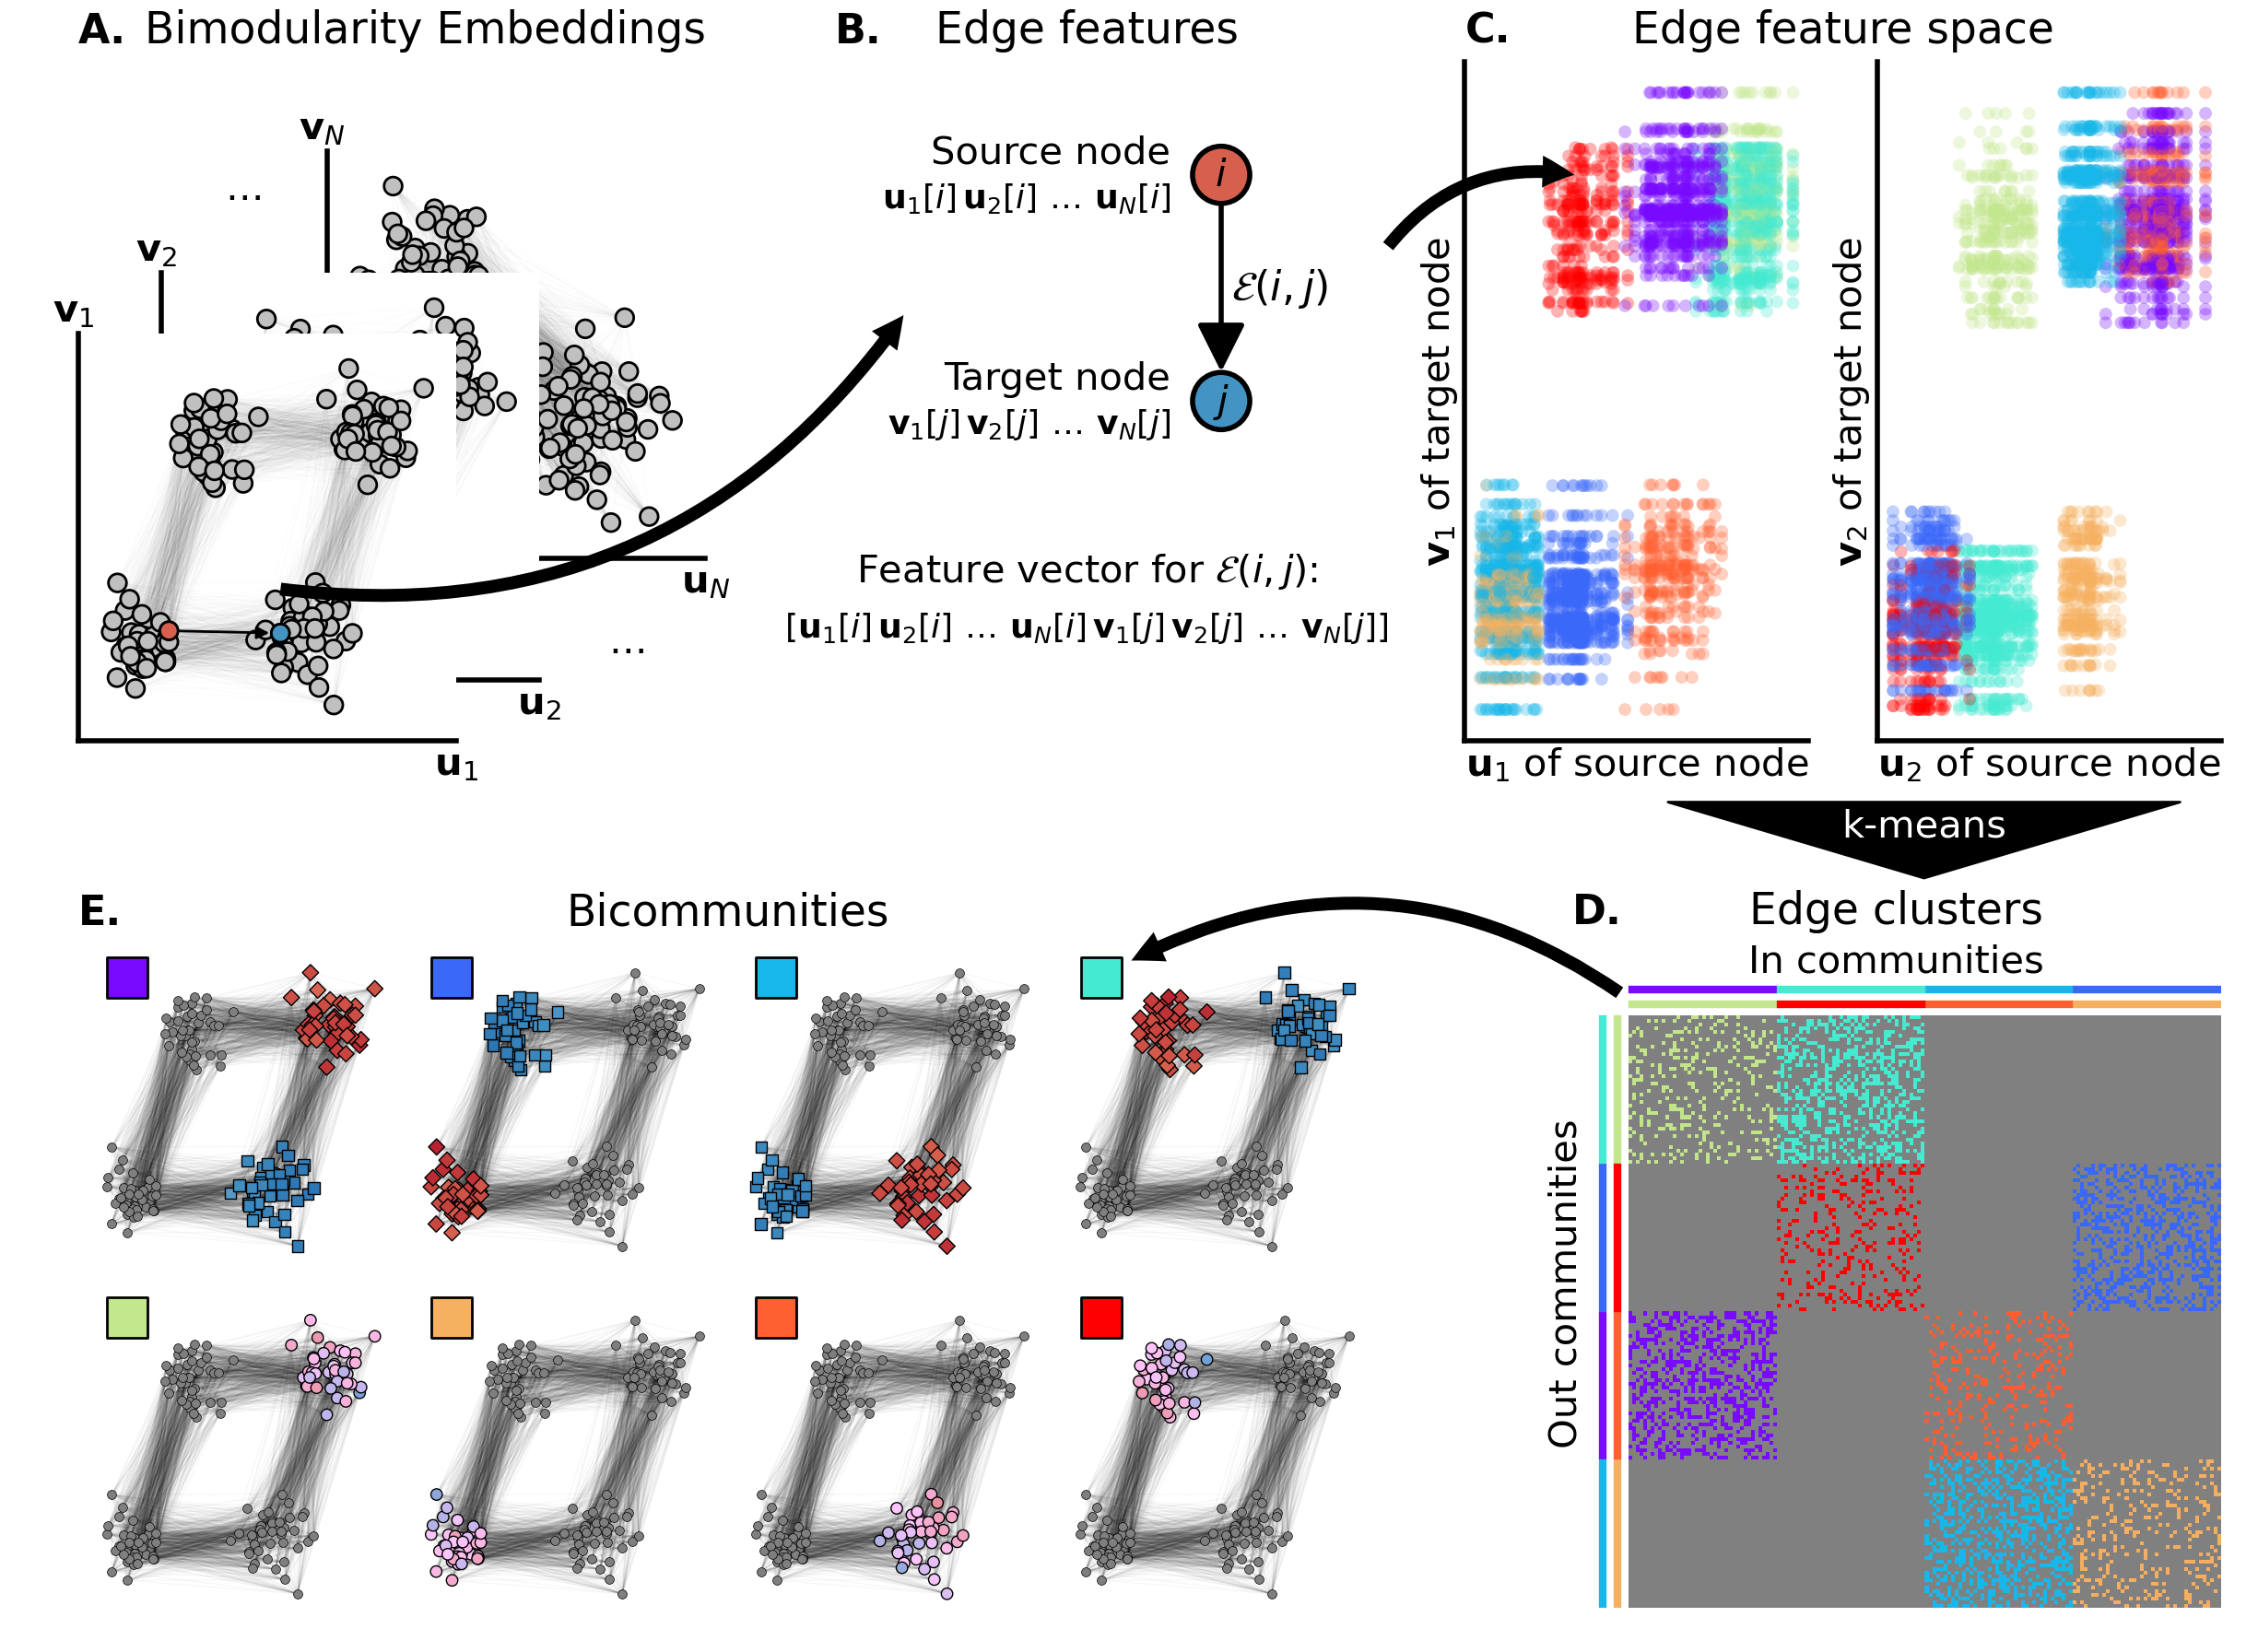

In [ ]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

fontscale = 1
stack_param = 0.03
n_svd_comp = 3
vector_id_max = 2

fig, all_axes = plt.subplots(nrows=2, figsize=(30, 22), gridspec_kw={"hspace":0.3})

for ax in all_axes:
    ax.axis("off")

#gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=all_axes[0], wspace=0.2) #, width_ratios=[1, 1, 1])
gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=all_axes[0], wspace=0.2, width_ratios=[1, 0.8, 1.2])
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=all_axes[1], wspace=0.2, width_ratios=[2, 1])

axes = [fig.add_subplot(gs1[0]),
        fig.add_subplot(gs1[1]),
        fig.add_subplot(gs1[2]),
        fig.add_subplot(gs2[1]),
        fig.add_subplot(gs2[0])]

n_per_com = 40
density_value = .4
show_n_eig = 20
fontscale = 1

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      connect_out_prob=[1, 0, 0.5, 0.5, 1, 0], seed=seed)

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

## Bimodularity embeddings
axes[0].set_title("Bimodularity Embeddings", fontsize=34*fontscale, pad=15, x=0.55)
axes[0].set_title("A.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

axes[0].axis("off")

pos = axes[0].get_position().bounds

j = n_svd_comp - 1
for i in range(n_svd_comp+1):
    new_ax = fig.add_axes([pos[0]+stack_param*(n_svd_comp-i),
                           pos[1]+stack_param*(n_svd_comp-i),
                           pos[2]*0.6, pos[3]*0.6])
    
    if i == 1:
        new_ax.set_xlabel("$\dots$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel("$\dots$", fontsize=30*fontscale, y=1.01, rotation=0)
        new_ax.spines[:].set_visible(False)
        new_ax.set_facecolor("none")
        new_ax.set_xticks([])
        new_ax.set_yticks([])
        continue
    
    selected = [158, 119]
    colors = ["silver"] * len(S)
    #if j == 0:
    #    colors = ["silver" if k != selected[0] else "tab:red" for k in range(len(S))]
    #    colors = [col if k != selected[1] else "tab:blue" for k, col in enumerate(colors)]
    
    new_ax.scatter(U[:, j], V[:, j], s=200, color=colors, edgecolors="k", lw=2, zorder=2)
    #new_ax.scatter(U[:, j], V[:, j], s=200, color="silver", edgecolors="k", lw=2, zorder=2)

    graph_pos = {node_i: (U[node_i, j], V[node_i, j]) for node_i in range(len(S))}
    nx_graph = nx.Graph(graph)
    nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=.01)

    if j == 0:
        color_2_nodes = [0.2, 0.8]
        highlight_graph = np.array([[0, 1], [0, 0]])
        new_ax.scatter(U[selected, j], V[selected, j], s=200, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=2, zorder=4)
    
        graph_pos = {highlight_i: (U[node_i, j], V[node_i, j]) for highlight_i, node_i in enumerate(selected)}
        nx_graph = nx.DiGraph(highlight_graph)
        arrow_list = nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=1, width=2, arrowsize=20)

        for arrow in arrow_list:
            arrow.set_zorder(3)

    new_ax.spines[["top", "right"]].set_visible(False)
    #new_ax.spines[["left", "bottom"]].set_linewidth(2)
    new_ax.spines[:].set_linewidth(4)
    new_ax.set_xticks([])
    new_ax.set_yticks([])
    
    if i == 0:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{N}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{N}}$", fontsize=30*fontscale, y=1.01, rotation=0)
    else:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{{j+1}}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{{j+1}}}$", fontsize=30*fontscale, y=1.01, rotation=0)

    j -= 1

## Edge features (computations)
axes[1].set_title("Edge features", fontsize=34*fontscale, pad=15)
axes[1].set_title("B.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})
axes[1].spines[:].set_visible(False)

two_nodes_g = nx.DiGraph(np.array([[0, 1], [0, 0]]))
#two_nodes_g_pos = {0: (0, 0), 1: (0.9, 0.9)}
two_nodes_g_pos = {0: (0.8, .92), 1: (0.8, 0.08)}

cmap = plt.get_cmap("RdBu", 5)
axes[1].scatter([0.8, 0.8], [1, 0], s=2000, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=4, zorder=2)
#axes[1].scatter([0.8, 0.8], [1, 0], s=2000, color="silver", edgecolors="k", lw=4, zorder=1)
nx.draw_networkx_edges(two_nodes_g, pos=two_nodes_g_pos, ax=axes[1], edge_color="k", width=4, arrowsize=80)

axes[1].text(0.8, 1, "$i$", fontsize=30*fontscale, ha="center", va="center")
axes[1].text(0.8, 0, "$j$", fontsize=30*fontscale, ha="center", va="center")

all_u_lab = []
all_v_lab = []
for i, val in enumerate(["1", "2", "...", "N"]):
    if val == "...":
        #lab_u = f"..."
        #lab_v = f"..."
        lab_u = f"$\dots$"
        lab_v = f"$\dots$"
    
        #all_u_lab.append(lab_u)
        #all_v_lab.append(lab_v)
    else:
        lab_u = f"$\mathbf{{u}}_{{{val}}}[i]$"
        lab_v = f"$\mathbf{{v}}_{{{val}}}[j]$"
    
    all_u_lab.append(lab_u[1:-1])
    all_v_lab.append(lab_v[1:-1])

    # axes[1].text(0.4*i-0.5, 1, lab_u, fontsize=30*fontscale, ha="right", va="center")
    # axes[1].text(0.4*i-0.5, 0.3, lab_v, fontsize=30*fontscale, ha="right", va="center")

u_feat = "$"+ "\,".join(all_u_lab) +"$"
v_feat = "$"+ "\,".join(all_v_lab) +"$"
axes[1].text(0.5, 0.9, u_feat, fontsize=26*fontscale, ha="right", va="center")
axes[1].text(0.5, -0.1, v_feat, fontsize=26*fontscale, ha="right", va="center")

axes[1].text(0.5, 1.1, "Source node", fontsize=30*fontscale, ha="right", va="center")
axes[1].text(0.5, 0.1, "Target node", fontsize=30*fontscale, ha="right", va="center")

# axes[1].text(1.1, 0.5, "$\mathcal{{E}}(i,j)$", fontsize=32*fontscale, ha="center", va="center")
axes[1].text(1.15, 0.5, "$\mathcal{{E}}(i,j)$", fontsize=32*fontscale, ha="center", va="center")

#feature_vec = r"$[$" + "$;\,$".join(all_u_lab) + "$;$\n" + "$;\,$".join(all_v_lab)+r"$]$"
#axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:\n" + feature_vec , fontsize=26*fontscale, ha="center", va="center")

feature_vec = r"$[" + "\,".join(all_u_lab+all_v_lab) + r"]$"
axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:", fontsize=30*fontscale, ha="center", va="center")
print(feature_vec)
axes[1].text(0, -1, feature_vec, fontsize=26*fontscale, ha="center", va="center")

axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)

## Edge feature scatter
cmap_to_use = cmap_8clusters

#axes[2].set_title("Feature matrix", fontsize=34*fontscale, pad=15)
axes[2].set_title("Edge feature space", fontsize=34*fontscale, pad=15)
axes[2].set_title("C.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

scale_factor = S**2/(S**2).sum()
assign = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max], assign_only=True)

maxval = np.max(np.abs(assign))

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max])
n_clusters = np.max(edge_clusters)

gs_scatter2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=axes[2], wspace=0.2)
ax_scatter2 = [fig.add_subplot(gs_scatter2[i]) for i in range(2)]

axes[2].axis("off")

markers = ["o", "o"]

for i in range(2):
    ax_scatter2[i].scatter(assign[:, i], assign[:, vector_id_max+i], s=100, marker=markers[i], c=edge_clusters_mat[edge_clusters_mat > 0],
                 cmap=cmap_8clusters.resampled(9), edgecolor="none", alpha=0.3, vmin=0, vmax=9)
    
    ax_scatter2[i].set_xticks([])
    ax_scatter2[i].set_yticks([])
    
    ax_scatter2[i].spines[["top", "right"]].set_visible(False)
    ax_scatter2[i].spines[:].set_linewidth(4)

    ax_scatter2[i].set_xlabel(f"$\mathbf{{u}}_{{{i+1}}}$ of source node", fontsize=30*fontscale)
    ax_scatter2[i].set_ylabel(f"$\mathbf{{v}}_{{{i+1}}}$ of target node", fontsize=30*fontscale)

# axes[2].set_xlabel("$\mathbf{{u}}_{{1}}$ of source node", fontsize=30*fontscale)
# axes[2].set_ylabel("$\mathbf{{v}}_{{1}}$ of target node", fontsize=30*fontscale)


axes[3].set_title("Edge clusters", fontsize=34*fontscale, pad=15)
axes[3].set_title("D.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

#edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max])
sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

n_clusters = np.max(edge_clusters)

#axes[3].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)
axes[3].imshow(edge_clusters_mat, cmap=cmap_to_use, interpolation="none", vmin=0, vmax=8)

#for com_i, (send, receive) in enumerate(zip(sending_communities, receiving_communities)):
for com_i in range(n_clusters):
    send = (edge_clusters_mat == com_i+1).sum(axis=1) > 0
    receive = (edge_clusters_mat == com_i+1).sum(axis=0) > 0

    plot_send = (np.where(send)[0].min(), np.where(send)[0].max())
    plot_receive = (np.where(receive)[0].min(), np.where(receive)[0].max())

    if plot_send == plot_receive:
        axes[3].plot([-3-0.5, -3-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-3-0.5, -3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+3-0.5, len(edge_clusters_mat)+3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    else:
        axes[3].plot([-7-0.5, -7-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-7-0.5, -7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+7-0.5, len(edge_clusters_mat)+7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    
    
#axes[3].plot([-1.5, -1.5], [-0.5, n_per_com-0.5], "k", lw=4)

# axes[3].set_xticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)
# axes[3].set_yticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)

axes[3].set_xlabel("In communities", fontsize=30*fontscale, labelpad=-10)
axes[3].xaxis.set_label_position('top') 
axes[3].set_ylabel("Out communities", fontsize=30*fontscale, labelpad=-10)

axes[3].set_xticks([])
axes[3].set_yticks([])

axes[3].spines[:].set_visible(False)

axes[4].set_title("Bicommunities", fontsize=34*fontscale, pad=15)
axes[4].set_title("E.", loc="left", fontsize=32*fontscale, pad=15, fontdict={"fontweight": "bold"})

axes[4].set_facecolor("none")

bimod = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)

sorted_id = np.flip(np.argsort(bimod))

#titles = [f"$Q_{{E}}(C_{{{i+1}}})={bimod[i]:1.2f},\,Q_{{N}}(C_{{{i+1}}})={bimod_node[i]:1.2f}$" for i in range(n_clusters)]
titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_id]

print(sorted_id)
sorted_id = np.arange(n_clusters)
reorder_id = [3, 2, 1, 0, 7, 6, 5, 4]

g_nx = nx.DiGraph(graph)
graph_pos = nx.spring_layout(g_nx)

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_id],
                               receiving_communities[sorted_id],
                               nrows=2, draw_legend=False, cmap=RedPurpleBlue,
                               fig=fig, axes=axes[4], titles=[""*n_clusters], edge_alpha=0.03)
                               #fig=fig, axes=axes[4], layout="", titles=[""*n_clusters], edge_alpha=0.03)

for com_i in range(n_clusters):
    axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)

axes[4].set_xlim(-0.15, 3.85)
axes[4].set_ylim(-0.9, 1.1)

#ax_arrows = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor="none")
ax_arrows = fig.add_axes([0.1, 0.1, 0.81, 0.8], facecolor="none")
ax_arrows.axis("off")

arrowscolor = "k"
for arrow_pos in [
    #(0.35, 0.75, 0.04, 0, ""),
    #(0.65, 0.75, 0.04, 0, ""),
    (0.855, 0.52, 0, -0.05, "k-means"),
    #(0.69, 0.22, -0.04, 0, "")
    ]:
    x_start, y_pos, x_size, y_size, text = arrow_pos

    arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor=arrowscolor, linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    if text != "":
        textcolor = "k"
        if arrowscolor == "k":
            textcolor = "w"
        ax_arrows.text(x_start+x_size/2, y_pos+y_size/3, text, color=textcolor, fontsize=30*fontscale, ha="center", va="center")

    ax_arrows.add_patch(arrow)

for arrow_pos in [
    (0.12, 0.65, 0.4, 0.82, "0.3"),
    #(0.615, 0.86, 0.7, 0.905, "-0.3"),
    (0.615, 0.86, 0.7, 0.905, "-0.3"),
    (0.72, 0.4, 0.5, 0.42, "0.3"),
    ]:
    x_start, y_start, x_stop, y_stop, rad = arrow_pos

    #arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor="silver", linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    arrow = FancyArrowPatch((x_start, y_start), (x_stop, y_stop), mutation_scale=50, facecolor=arrowscolor, linewidth=0, connectionstyle=f"arc3,rad={rad}", arrowstyle=ArrowStyle("simple"))

    ax_arrows.add_patch(arrow)

# rectangle_highlight = Rectangle((0.702, 0.9), 0.29, 0.01, edgecolor=arrowscolor, facecolor="none", lw=3)
# ax_arrows.add_patch(rectangle_highlight)

# fig.savefig(op.join(path_to_figures, "Figure-02-BicommunityDetection-vScatter.png"), dpi=300, bbox_inches="tight")
# fig.savefig(op.join(path_to_figures, "Figure-02-BicommunityDetection-vScatter-Overleaf.png"), dpi=100, bbox_inches="tight")

# *C. Elegans* example (Figure 2)

In [6]:
import data_load
importlib.reload(data_load)

no_sex = False
gap_junc = False

wiring_sym, neuron_df = data_load.load_celegans_graph(no_sex=no_sex, gap_junc=gap_junc)

wiring_mod = dgsp.modularity_matrix(wiring_sym, null_model="outin")
print(f"Asymmetric wiring matrix has shape {wiring_sym.shape}")

nodes_labels = neuron_df.loc[:, "Neuron"]
nodes_posx = neuron_df.loc[:, "Position x"]
nodes_posy = neuron_df.loc[:, "Position y"]

d_mat = np.diag(wiring_sym.sum(axis=1))

U, S, Vh = dgsp.sorted_SVD(wiring_mod, fix_negative=False)
V = Vh.T

sort_idx = np.flip(np.argsort(S))
S = S[sort_idx]
U = U[:, sort_idx]
V = V[:, sort_idx]

neuron_df

There are 280 neurons in the dataset
All neuron sub-types are:
['SENSORY NEURONS_6' 'SENSORY NEURONS_5' 'SENSORY NEURONS_4'
 'SENSORY NEURONS_3' 'SENSORY NEURONS_2' 'SENSORY NEURONS_1'
 'INTERNEURONS_4' 'INTERNEURONS_3' 'INTERNEURONS_2' 'INTERNEURONS_1'
 'MOTOR NEURONS_HEAD' 'MOTOR NEURONS_SUBLATERAL'
 'MOTOR NEURONS_VENTRAL CORD' 'SEX SPECIFIC_VENTRAL CORD']
Asymmetric wiring matrix has shape (279, 279)


Neuron             Type  Type_num  Position x  Position y
0     ADAL     INTERNEURONS         1    0.011068    0.005903
1     ADAR     INTERNEURONS         1    0.014206    0.002204
2     ADEL  SENSORY NEURONS         0    0.016233    0.005657
3     ADER  SENSORY NEURONS         0    0.014941    0.009308
4     ADFL  SENSORY NEURONS         0    0.082393   -0.000984
..     ...              ...       ...         ...         ...
274   VD05    MOTOR NEURONS         2   -0.314388    0.042732
275   VD06    MOTOR NEURONS         2   -0.405957    0.044258
276   VD07    MOTOR NEURONS         2   -0.488369    0.041206
277   VD08    MOTOR NEURONS         2   -0.596726    0.042732
278   VD09    MOTOR NEURONS         2   -0.688295    0.038154

[279 rows x 5 columns]

R^2 = 0.060656972613147044


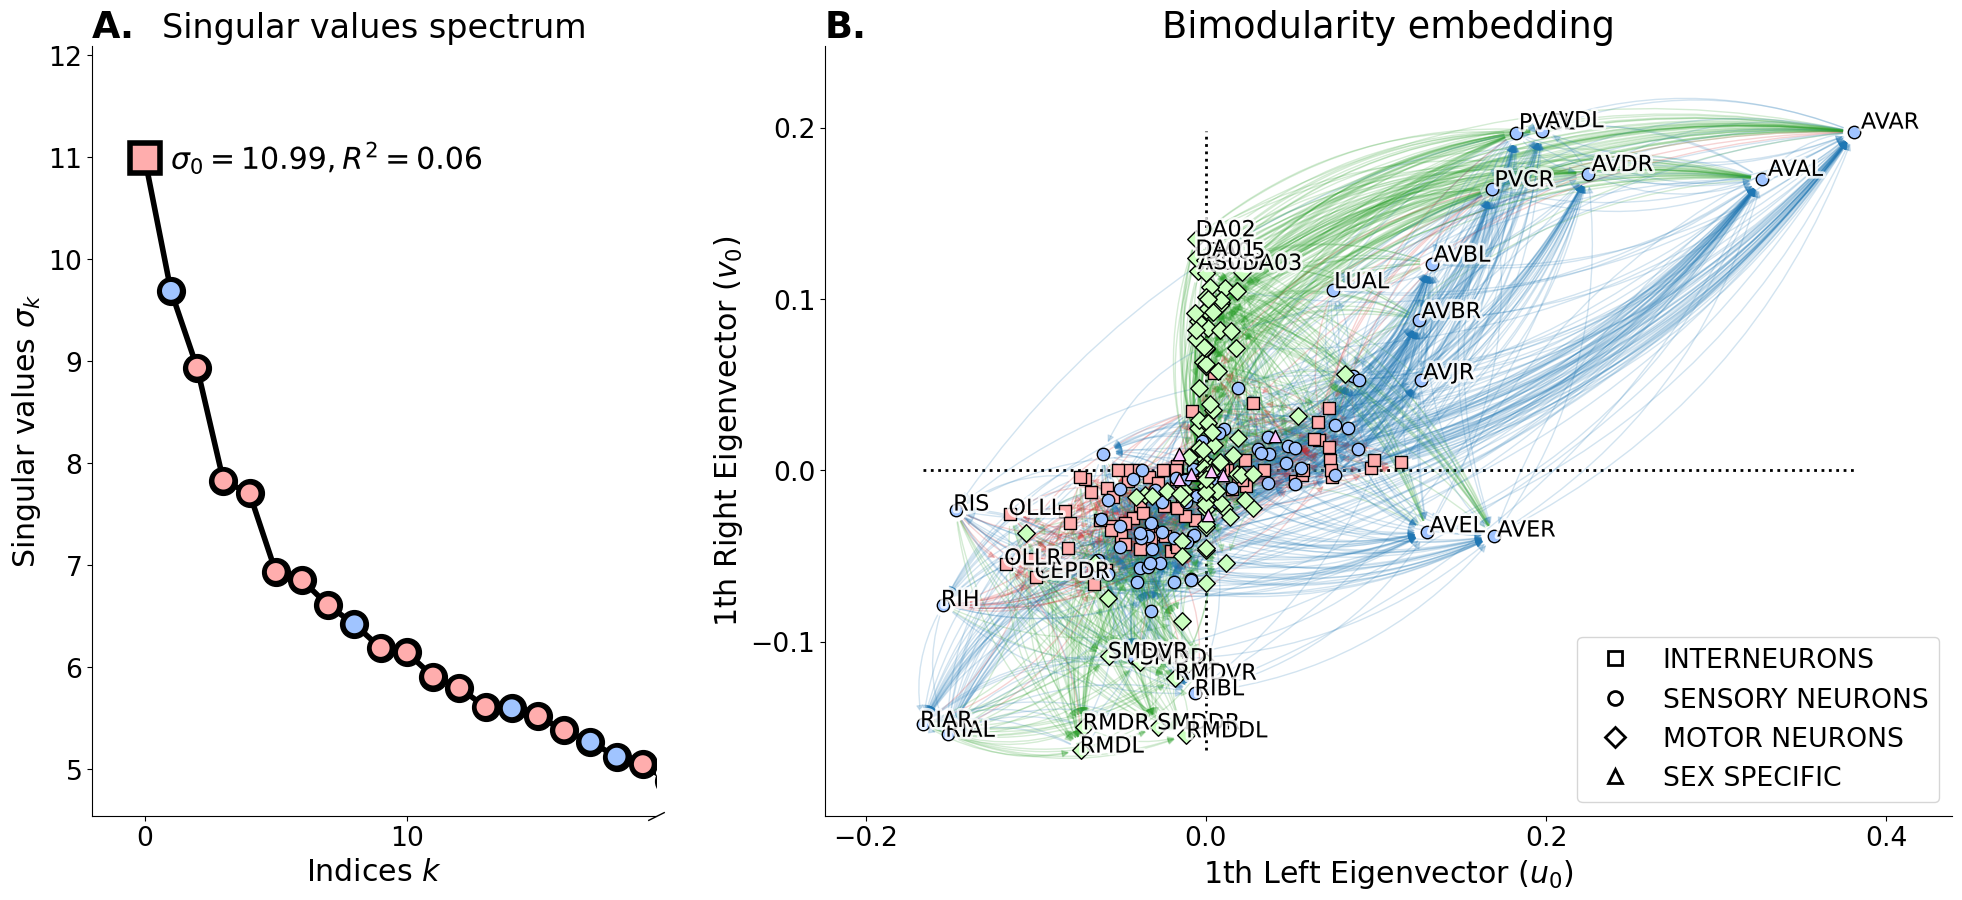

In [7]:
importlib.reload(plot)

fontscale = 1.2
alpha_perc = 88
show_markers = True
uneven_ratios = 1
testing = False
eig_id = np.where(S > 1e-10)[0][0]

fig, all_axes = plt.subplots(figsize=(2*12, 10))
suffix = "Rect" + "_".join([f"{inch:1.0f}" for inch in fig.get_size_inches()])

gs1 = GridSpecFromSubplotSpec(1, 2, subplot_spec=all_axes, width_ratios=[1, 1 + uneven_ratios])

axes = [fig.add_subplot(gs1[0]), fig.add_subplot(gs1[1])]

all_axes.set_xticks([])
all_axes.set_yticks([])
all_axes.spines[:].set_visible(False)


#################################################################################
###     First plot
#################################################################################

axes[0] = plot.plot_spectrum(wiring_sym, vector_id=eig_id,
                             show_n_eig=20,
                             write_s=True, fig=fig,
                             split_ax=False,
                             ax=axes[0], fontscale=fontscale, fix_negative=False,
                             override_title="Singular values spectrum", title_letter="A.")


#################################################################################
###     Second plot
#################################################################################
graph = nx.DiGraph(wiring_sym)
graph_pos = {i: (U[i, eig_id], V[i, eig_id]) for i in range(wiring_sym.shape[0])}

if not testing:
    edge_colors = np.zeros_like(np.array(graph.edges())[:, 0])

    for i, (_, target) in enumerate(graph.edges()):
        edge_colors[i] = neuron_df[neuron_df["Neuron"] == nodes_labels[target]]["Type_num"].values[0]
        
    colors = palette_rgb

    nx.draw_networkx_edges(graph, pos=graph_pos, ax=axes[1], edge_color=colors_edges[edge_colors],
                           alpha=edge_a, connectionstyle=edge_cs)

type_manual = ["SENSORY NEURONS", "INTERNEURONS", "MOTOR NEURONS", "SEX SPECIFIC"]

#for i, n_type in enumerate(neuron_df["Type"].unique()):
for i, n_type in enumerate(type_manual):
    neurons_in_type = neuron_df.loc[neuron_df["Type"] == n_type, "Neuron"]

    type_mask = np.array([lab in neurons_in_type.values for lab in nodes_labels])
    axes[1].scatter(U[type_mask, eig_id], V[type_mask, eig_id], color=colors[i], s=80, label=n_type,
                    zorder=3, edgecolor="k", lw=1, alpha=1, marker=markers[i])

alpha_factor = 0.2
alpha_threshold = 0.45
squared_rad = U[:, eig_id] ** 2 + V[:, eig_id] ** 2
alpha_vector = squared_rad
alpha_vector = np.clip(alpha_vector/(alpha_vector.max() * alpha_factor), a_min=0, a_max=1)

alpha_vector[alpha_vector < alpha_threshold] = 0
alpha_vector = (squared_rad > np.percentile(squared_rad, alpha_perc)).astype(int)

sorted_by_radius = np.argsort(squared_rad)

#for i, neuron in enumerate(nodes_labels):
for i in sorted_by_radius:
    #if neuron in label_filter:
    if True:
        axes[1].text(1.01*U[i, eig_id], 1.01*V[i, eig_id], nodes_labels[i], fontsize=16, alpha=alpha_vector[i],
                     path_effects=[
                         withStroke(
                             linewidth=4,
                             foreground="w",
                             alpha=0.8*alpha_vector[i],
                             )])

x_max, y_max = np.max(np.vstack([U[:, eig_id], V[:, eig_id]]), axis=1)
x_min, y_min = np.min(np.vstack([U[:, eig_id], V[:, eig_id]]), axis=1)

abs_min = max([x_min, y_min])
abs_max = min([x_max, y_max])

#axes.plot([abs_min, abs_max], [abs_min, abs_max], color="tab:orange")
axes[1].plot([0, 0], [y_min, y_max], ls=":", lw=2, color="k", zorder=0)
axes[1].plot([x_min, x_max], [0, 0], ls=":", lw=2, color="k", zorder=0)

legend_elements = [Line2D([0], [0], color="w", alpha=1, markersize=10, markeredgecolor="k",
                          markeredgewidth=2, marker=markers[i], label=type) for i, type in enumerate(neuron_df["Type"].unique())]

# Parameters
axes[1].set_title(f"B.", fontsize=22 * fontscale, loc="left", fontdict={"fontweight": "bold"})
axes[1].set_title(f"Bimodularity embedding", fontsize=22 * fontscale)
#axes[1].set_title(f"Bi-modularity embedding $s_{{{eig_id+1}}}={S[eig_id]:1.2f}$", fontsize=22 * fontscale)
axes[1].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize=16 * fontscale)
axes[1].set_xticks(np.linspace(-0.2, .4, 4))
axes[1].set_yticks(np.linspace(-.1, .2, 4))
axes[1].set_xlabel(f"{eig_id + 1}th Left Eigenvector ($u_{{{eig_id}}}$)", fontsize=18 * fontscale)
axes[1].set_ylabel(f"{eig_id + 1}th Right Eigenvector ($v_{{{eig_id}}}$)", fontsize=18 * fontscale)
axes[1].spines[["top", "right"]].set_visible(False)
#axes[1].legend(fontsize=16 * fontscale, loc="lower right")
axes[1].legend(handles=legend_elements, fontsize=16 * fontscale, loc="lower right")


fig.savefig(op.join(path_to_figures, f"Figure-03-eig{eig_id:02d}{'-noSex'*no_sex}{'-Gap'*gap_junc}-v00-{suffix}-No3rd.png"), dpi=300, bbox_inches="tight")

# Overleaf version
fig.savefig(op.join(path_to_figures, f"Figure-03-eig{eig_id:02d}{'-noSex'*no_sex}{'-Gap'*gap_junc}-v00-No3rd-Overleaf{suffix}.png"),
            dpi=100, bbox_inches="tight")

# _C. elegans_ bicommunities (Figure 4)

In [8]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

graph = wiring_sym

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

n_nodes = graph.shape[0]

#vector_id_max = 4
vector_id_max = 5
n_kmeans = 5

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans",
                                                           n_kmeans=n_kmeans, verbose=True, max_k=10)
n_clusters = np.max(edge_clusters)

sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

bimod_quad = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)
#bimod_quad = bimod_quad**sum_power/np.sum(bimod_quad**sum_power)
sorted_by_quad = np.flip(np.argsort(bimod_quad))

titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod_quad[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_by_quad]

Found 5 clusters !


/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),


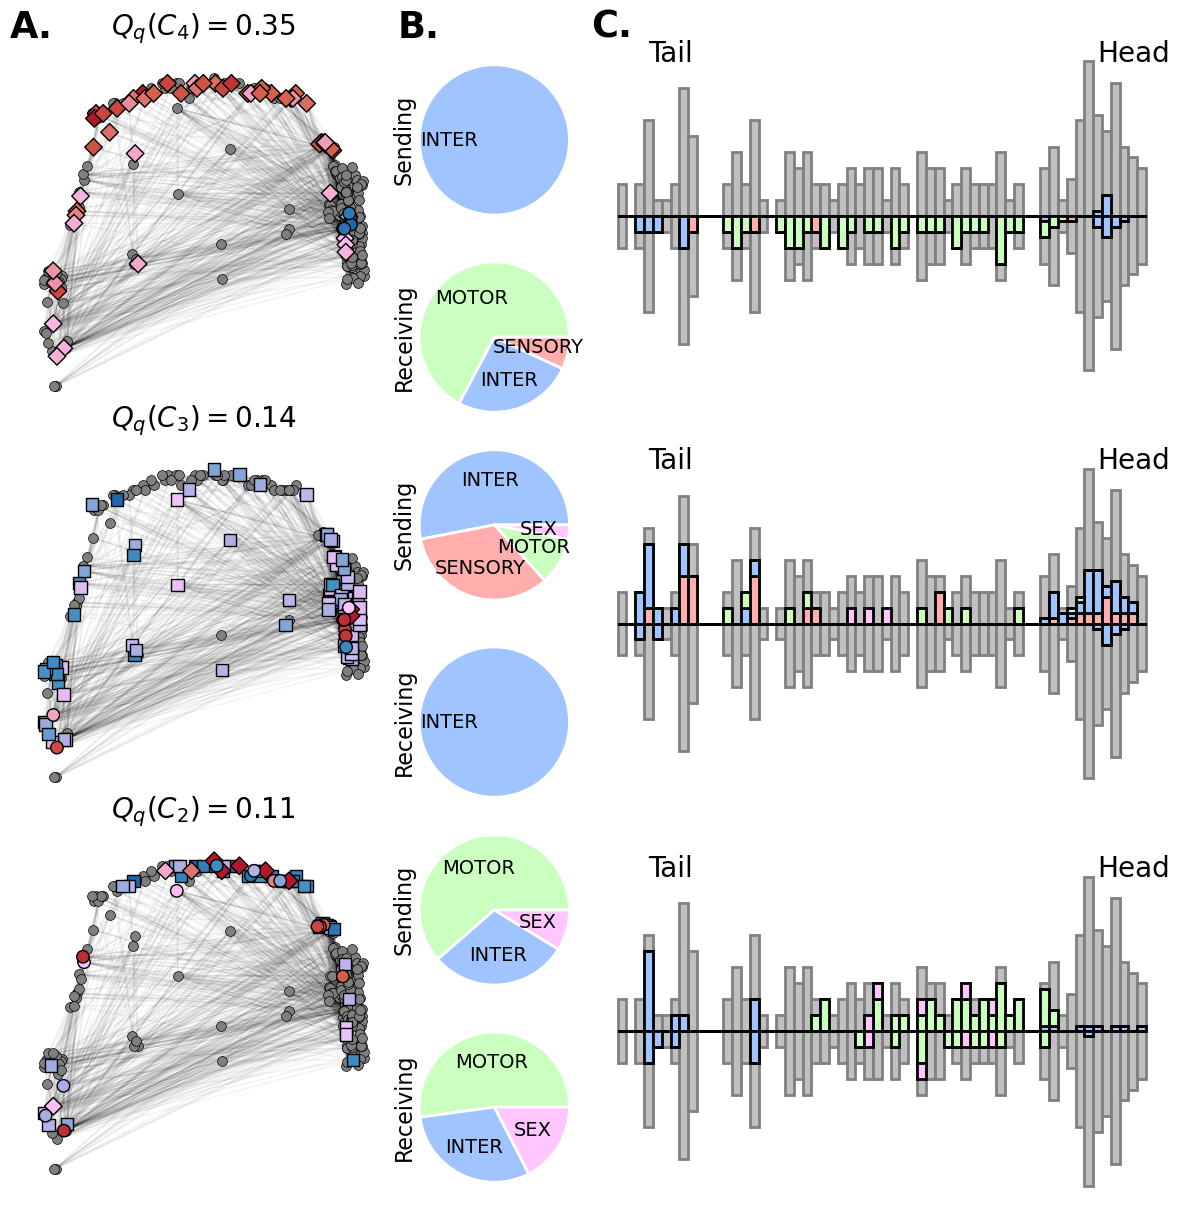

In [10]:
importlib.reload(dgsp_plot)

n_show_comp = 3

x_norm = nodes_posx + 0.4
y_norm = (nodes_posy - nodes_posy.min())

angle = np.arctan2(y_norm/np.abs(y_norm).max(), x_norm/np.abs(x_norm).max())
angle = (angle - angle.min())/(angle.max() - angle.min())

angle = 1 - angle

fig, axes = plt.subplots(ncols=3, figsize=(15, 5*len(sending_communities[:n_show_comp])),
                         gridspec_kw={"wspace":0, "width_ratios":[2, 1, 3]})

letters = ["A.", "B.", "C."]
for ax, let in zip(axes, letters):
    ax.axis("off")
    ax.set_title(let, fontsize=22 * fontscale, loc="left", fontdict={"fontweight": "bold"})

graph_pos = {i: (x, y) for i, (x, y) in enumerate(zip(nodes_posx, nodes_posy))}

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_by_quad][:n_show_comp],
                               receiving_communities[sorted_by_quad][:n_show_comp],
                               cmap=RedPurpleBlue, fig=fig, axes=axes[0], nrows=3, draw_legend=False,
                               scatter_only=False, titles=titles[:n_show_comp], layout=graph_pos)

true_types = ["SENSORY NEURONS", "INTERNEURONS", "MOTOR NEURONS", "SEX SPECIFIC"]
manual_types = ["SENSORY", "INTER", "MOTOR", "SEX"]

type2lab = {t: l for t, l in zip(true_types, manual_types)}
type_mod = neuron_df.loc[:, "Type"].map(type2lab)

colors = {t: c for t, c in zip(manual_types, palette_rgb)}

n_bins = 60

count_weights = np.ones(n_bins)
count_weights[:47] = 3

gs_bars = GridSpecFromSubplotSpec(nrows=n_show_comp, ncols=1, subplot_spec=axes[2])
axes_bar = [fig.add_subplot(gs_bars[i], facecolor="none") for i in range(n_show_comp)]

for ax_i, com_id in enumerate(sorted_by_quad[:n_show_comp]):

    axes_bar[ax_i].axis("off")

    count, bins = np.histogram(angle, bins=n_bins)
    
    axes_bar[ax_i].text(0.05, count.max(), "Tail", fontsize=20)
    axes_bar[ax_i].text(0.9, count.max(), "Head", fontsize=20)
    
    axes_bar[ax_i].bar(bins[:-1], count_weights*count, width=1/n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)
    axes_bar[ax_i].bar(bins[:-1], -count_weights*count, width=1/n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)

    com_label = ["Send", "Receive"]
    mult = [1, -1]
    for com_i, com in enumerate([sending_communities[com_id], receiving_communities[com_id]]):
        fltr_com = com > 0
        count_previous = np.zeros_like(count, dtype=float)

        for i, n_type in enumerate(manual_types):
            #print(n_type)
            neurons_in_type = neuron_df.loc[type_mod == n_type, "Neuron"]
            type_mask = np.array([lab in neurons_in_type.values for lab in nodes_labels])

            mask = np.logical_and(type_mask, fltr_com)

            weights = np.ones_like(angle[mask])
            
            count_norm, _ = np.histogram(angle[mask], bins=bins, weights=mult[com_i]*weights)
            
            axes_bar[ax_i].bar(bins[:-1], count_weights*count_norm, width=1/n_bins, bottom=count_weights*count_previous, color=palette_rgb[i], lw=2, edgecolor="k")
            
            count_previous += count_norm.copy()
    #axes_bar[ax_i].legend(ncols=4)

pie_gs = GridSpecFromSubplotSpec(len(sending_communities[:n_show_comp]), 1, subplot_spec=axes[1], wspace=0, hspace=0)
pie_axes = [fig.add_subplot(pie_gs[i] ) for i in range(len(sending_communities[:n_show_comp]))]
dgsp_plot.plot_bicommunity_types(sending_communities[sorted_by_quad][:n_show_comp],
                       receiving_communities[sorted_by_quad][:n_show_comp], axes=pie_axes, fig=fig,
                       titles=titles, type_colors=colors, fontsize=14,
                       types=type_mod)

fig.savefig(op.join(path_to_figures, f"Figure-04-CelegansBicommunities-Nvec{vector_id_max}k{n_kmeans}-Show{n_show_comp}-v01.png"), dpi=300, bbox_inches="tight")

# Comparisons with symmetric verions

# Supplementaries
## Less ideal synthetic model (`SI-Synth-LessIdeal`)

In [ ]:
importlib.reload(plot)

n_per_com = 40
rand_density = 0

con_densities = [0.2, 0.4, 0.5, 0.6, 0.8]
dir_densities = [0.5, 0.6, 0.7, 0.8, 1]

eig_id = 0
fontscale = 2

write_s = True
for_overleaf = True

fig, axes = plt.subplots(len(con_densities), len(dir_densities),
                         gridspec_kw={"hspace": 0, "wspace": 0},
                         #gridspec_kw={"hspace": 0.08, "wspace": 0.08},
                         figsize=(len(con_densities)*8, len(dir_densities)*8))#,
                         #sharex=True, sharey=True)

for row_i, ax_row in enumerate(axes):
    for col_i, ax in enumerate(ax_row):
        # Building the graph
        graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=con_densities[row_i],
                                              connect_density=[con_densities[row_i], con_densities[row_i], 0, con_densities[row_i],
                                                               con_densities[row_i], con_densities[row_i]],
                                              connect_out_prob=[dir_densities[col_i], 1-dir_densities[col_i], 1-dir_densities[col_i],
                                                                0.5, dir_densities[col_i], 1-dir_densities[col_i]],
                                              seed=1234)
        
        graph += dgsp_graphs.random_graph(n_per_com*4, rand_density, seed=1234)
        graph = (graph > 0).astype(int)

        title = ""
        if row_i == 0:
            title += f"$\gamma_{{dir}}={dir_densities[col_i]}$"

        ax = plot.plot_graph_embedding(graph, vector_id=eig_id, write_label=True, write_var=True,
                                       ax=ax, directed_edges=False,
                                       override_title=title, fontscale=fontscale, label_lw=6)

        ax.spines[:].set_visible(True)

        ax.set_xlabel("")
        ax.set_ylabel("")
        
        if col_i == 0:
            ax.set_ylabel(f"$\gamma_{{con}}={con_densities[row_i]}$", fontsize=22*fontscale)

        ax.set_yticks([])
        ax.set_xticks([])

fig.savefig(op.join(path_to_figures, f"SI-Synth-LessIdeal-r{rand_density:1.1f}-Overleaf.png"), dpi=100, bbox_inches="tight")

# Assortiative to Dissortative and Undirected to Directed (`SI-Synth-AssortDissort`)

In [ ]:
importlib.reload(plot)

n_per_com = 40
rand_density = 0

base_density = 0.8
#con_densities = [0.2, 0.4, 0.5, 0.6, 0.8]
con_densities = [0.8, 0.6, 0.5, 0.4, 0.2]
dir_densities = [0.5, 0.6, 0.7, 0.8, 1]

vector_id = 0
fontscale = 2

write_s = True
for_overleaf = True

fig, axes = plt.subplots(len(con_densities), len(dir_densities),
                         gridspec_kw={"hspace": 0.01, "wspace": 0.01},
                         #gridspec_kw={"hspace": 0.08, "wspace": 0.08},
                         figsize=(len(con_densities)*5, len(dir_densities)*5))#,
                         #sharex=True, sharey=True)

for row_i, ax_row in enumerate(axes):
    for col_i, ax in enumerate(ax_row):
        # Building the graph
        graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=base_density*con_densities[row_i],
                                              connect_density=[base_density*con_densities[row_i],
                                                               base_density*(1-con_densities[row_i]),
                                                               base_density*(1-con_densities[row_i]),
                                                               base_density*(1-con_densities[row_i]),
                                                               base_density*(1-con_densities[row_i]),
                                                               base_density*con_densities[row_i]],
                                              connect_out_prob=[0.5,
                                                                dir_densities[col_i],
                                                                dir_densities[col_i],
                                                                dir_densities[col_i],
                                                                dir_densities[col_i],
                                                                0.5],
                                              seed=1234)

        title = ""
        if row_i == 0:
            title += f"$\gamma_{{dir}}={dir_densities[col_i]}$"

        ax = plot.plot_graph_embedding(graph, vector_id=eig_id, n_com=2,
                                       ax=ax, directed_edges=False,
                                       override_title=title, fontscale=fontscale, label_lw=6, fix_negative=False)
        #ax = plot.plot_adjacency(graph, ax=ax, title_letter="", use_cmap=False, override_title=title)
        #U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
        #ax.plot(S)

        ax.spines[:].set_visible(True)

        ax.set_xlabel("")
        ax.set_ylabel("")
        
        if col_i == 0:
            ax.set_ylabel(f"$\gamma_{{con}}={con_densities[row_i]}$", fontsize=12*fontscale)

        ax.set_yticks([])
        ax.set_xticks([])

fig.savefig(op.join(path_to_figures, f"SI-Synth-AssorDissor-Overleaf.png"), dpi=100, bbox_inches="tight")